Surv_times

In [1]:
import pandas as pd

all_patients = pd.read_csv(
    "/media/sciobiome/DATA/sklein_tmp/" + "survival_status.csv"
)
all_patients = all_patients.set_index("case")
all_patients.head()


surv_days  death  uncensored
case                              
1         218.0    1.0         1.0
2        2466.0    1.0         1.0
3         550.0    1.0         1.0
4         331.0    1.0         1.0
5          27.0    1.0         1.0

Survival Status full dataset

/home/sciobiome/micromamba/envs/sklein/lib/python3.10/site-packages/lifelines/plotting.py:727: UserWarning: For less visual clutter, you may want to subsample to less than 25 individuals.
  warnings.warn("For less visual clutter, you may want to subsample to less than 25 individuals.")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


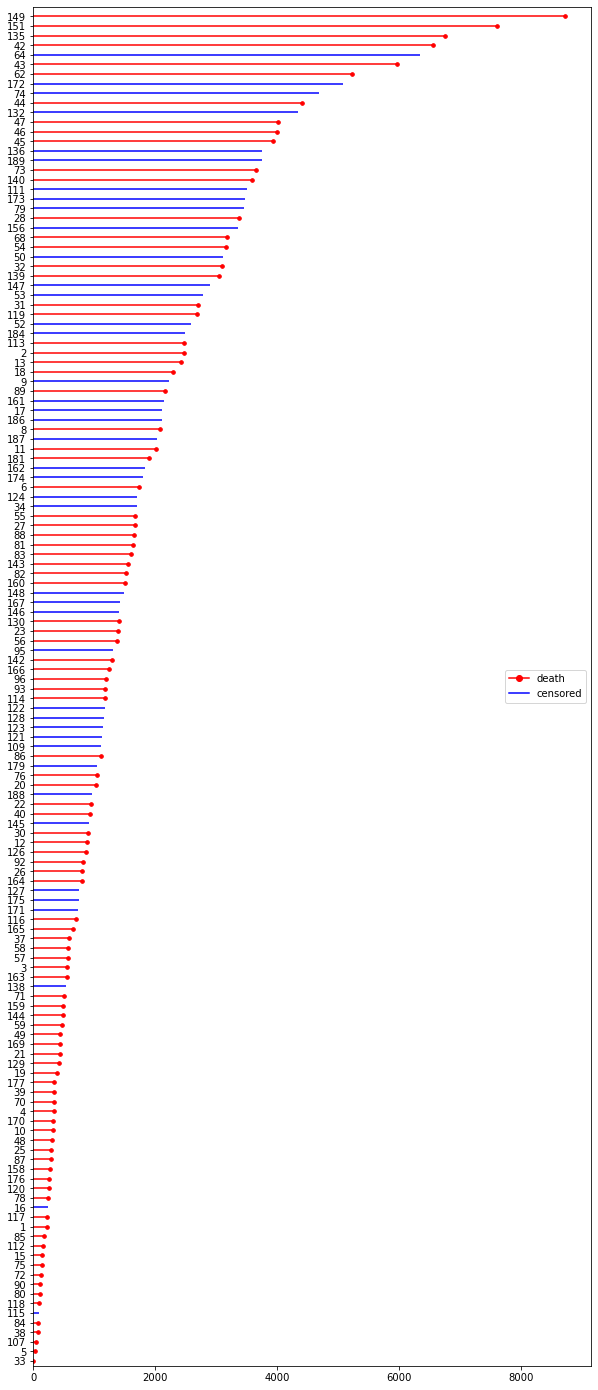

In [2]:
from lifelines.plotting import plot_lifetimes

import matplotlib.lines as mlines
import matplotlib.pyplot as plt


death_c = "red"
censor_c = "blue"

plt.figure(figsize=(10, 25))
ax = plot_lifetimes(
    all_patients["surv_days"],
    all_patients["uncensored"],
    sort_by_duration=True,
    event_observed_color=death_c,
    event_censored_color=censor_c,
)

red = mlines.Line2D([], [], color=death_c, marker="o", label="death")
blue = mlines.Line2D([], [], color=censor_c, marker="", label="censored")
ax.legend(loc="center right")
ax.legend(handles=[red, blue], loc="center right")


## Survival Analysis on RCC data

load data in normalized, standardized form

In [5]:
from src.datasets.rcc_dataset import RCCDataset, rcc_to_csv

dataset = RCCDataset(
    "/media/sciobiome/DATA/sklein_tmp/DigiStrucMed_Braesen/NanoString_RCC/",
    "/media/sciobiome/DATA/sklein_tmp/" + "survival_status.csv",
)
data = dataset.nonscaled_data.drop(["death", "case"], axis=1)
data.columns = [c.replace("uncensored", "death") for c in data.columns]


In [6]:
data

A2M     ACVR1C       ADAM12      ADGRE1          ADM   
119   3646.718895  10.008919   184.041546    6.740700   930.829441  \
129     51.008248   1.100897     5.590832   -0.626001     6.281591   
159   8787.383122  42.471992   436.957611   79.904934  2513.046160   
160   3154.995513   7.408577   309.043505    7.408577   576.810652   
161   6926.426585   2.689714   994.159565    4.344922  2790.060713   
165  18651.870674  26.268632   472.454667   23.222993  2249.584712   
177  12515.078740  43.234371  1659.578167   20.628164  5509.415209   
146  21812.735895  37.870529  4486.854320  142.530898  4367.504776   
162  15533.582084  18.800393   429.695570  111.833263  4397.547494   
167  13889.688971  37.017234  1364.153640   61.146987  2934.781187   
172   4355.544835  22.238790    61.900325    4.107802  2126.566542   
186   6103.789158   4.654643   858.005949    8.533513  1754.024820   
188  21172.992598  20.073612    74.225682   76.092995  5254.151289   
145     19.201909   6.998391    -0.454139    4.762632     5.507885   
151   3203.758798  11.082103    40.978011    1.804063   857.960988   
156    851.940316   1.231246    -0.082083   -0.082083   405.080013   
163    636.164863   3.442360    93.111632   -1.931080   429.287442   
166    312.765722   2.072038    28.056513    4.536083   223.388087   
136   2204.983930   6.860665     6.183069   -0.592897  1158.097233   
113    671.027537   1.932206    22.752711    4.771366   286.794575   
171   5308.722847  24.216983  1202.643377    2.601825  3221.659252   
173   2628.503195   1.111750     3.727631    3.204455  1991.274446   
187   4562.605525   7.598586    43.519175    4.144683  2660.195894   
189   5273.121964  14.060468   332.764416   48.876866   837.155817   

        ADORA2A         AKT1         ALDOA        ALDOC      ANGPT1  ...   
119   50.044594   916.122458   7053.836532   322.123772   59.849249  ...  \
129    0.928208    20.269464    762.317505    13.879942    0.928208  ...   
159  241.154530  5715.002425  62512.293186   197.962674  186.444845  ...   
160   76.202508   945.122775   7931.411061   306.926769   64.560458  ...   
161  117.726700  1785.349195   7701.064132   365.180360  104.485032  ...   
165  108.500870  2580.036486  25696.432448   454.180836  140.480074  ...   
177  343.896923  4148.521551  48777.695294   782.457338  174.350371  ...   
146  164.564660  4486.854320  48772.879936  2143.930953  300.439527  ...   
162  265.337499  3247.040996  24742.285709  1014.252106  327.359413  ...   
167  578.839866  4349.662149  33809.896736   657.809966  173.021296  ...   
172   75.498566  1642.695810  17638.759652   809.803565   69.832632  ...   
186   43.443339  1411.908524   8635.139440  1025.573115  116.366087  ...   
188  288.966650  3937.695790  31510.436057  3063.793417  421.545856  ...   
145    6.439452     8.582054      3.737910    10.910970    6.905235  ...   
151   42.524351   674.461972   3454.265881   150.768152   59.534091  ...   
156   12.394545   214.647261   1717.096008   312.161964   12.066213  ...   
163   11.502519   167.668105   1548.306222    22.249398    5.793239  ...   
166    5.656103   155.066837   1535.156084    95.033739    9.240169  ...   
136   55.647618   550.293112   5761.010716   381.571567   41.418090  ...   
113   12.657921   303.829534   3576.118960   106.034733   13.919770  ...   
171   58.641123  1626.140363  19012.733056  1591.716223   65.045615  ...   
173   22.038802   576.082518   3755.424974   350.070351   22.561979  ...   
187   52.499322   769.529531  10481.213267  1110.084342   82.202885  ...   
189   99.762370  1448.674595  23362.472343  1383.505441   60.482332  ...   

          WNT5A        WNT5B      WNT7B      XCL1/2        ZAP70     ZC3H12A   
119   99.884924    33.703502   5.106591   39.422884   140.737653   39.422884  \
129    7.145040     3.000485  -0.798690    0.755518     0.064759    1.618967   
159  526.220780  1675.124152   7.918507   33.833621   169.168103  578.051007   
160  113.245394    43.393095  -6.350209   

In [9]:
# raw data, normalized by housekeeping genes and positive controls
# rcc_to_csv("/media/sciobiome/DATA/sklein_tmp/NanoString_RCC/").head()

ValueError: not enough values to unpack (expected 2, got 0)

In [10]:
# standardized data
dataset.data.head()

A2M    ACVR1C    ADAM12    ADGRE1       ADM   ADORA2A      AKT1   
119 -0.466303 -0.349444 -0.381631 -0.487444 -0.643325 -0.469648 -0.496847  \
129 -1.004615 -1.003458 -0.569654 -0.676359 -1.210979 -0.830594 -1.039260   
159  0.303302  2.033944 -0.115149  1.388805  0.328124  0.934777  2.408735   
160 -0.539919 -0.540358 -0.249924 -0.470317 -0.860686 -0.277419 -0.479289   
161  0.024700 -0.886809  0.471942 -0.548883  0.498205  0.027733  0.029444   

        ALDOA     ALDOC    ANGPT1  ...     WNT7B    XCL1/2     ZAP70   
119 -0.559433 -0.509147 -0.414897  ...  0.054879  0.040053 -0.194221  \
129 -0.925971 -0.930419 -0.956916  ... -0.297156 -0.731215 -0.668292   
159  2.671526 -0.678836  0.749664  ...  0.222508 -0.071432 -0.098410   
160 -0.508306 -0.529916 -0.371558  ... -0.628102 -0.134082 -0.219103   
161 -0.521726 -0.450302 -0.004290  ... -0.039863 -0.511052 -0.202043   

      ZC3H12A      ZEB1      ZEB2  case  surv_days  death  uncensored  
119 -0.490618 -0.692225 -0.454276   119     2677.0    1.0         1.0  
129 -0.750280 -1.087090 -0.938563   129      414.0    1.0         1.0  
159  3.209040  1.203220 -0.037995   159      490.0    1.0         1.0  
160 -0.456078 -0.549323 -0.505197   160     1502.0    1.0         1.0  
161  0.018802  0.250508  0.161712   161     2137.0    0.0         0.0  

[5 rows x 754 columns]

Start analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


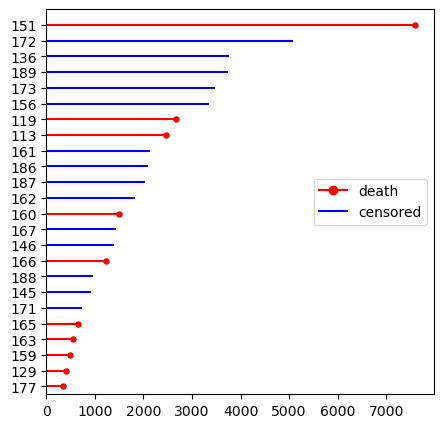

In [ ]:
from lifelines.plotting import plot_lifetimes

import matplotlib.lines as mlines
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))

death_c = "red"
censor_c = "blue"

ax = plot_lifetimes(
    data["surv_days"],
    data["death"],
    sort_by_duration=True,
    event_observed_color=death_c,
    event_censored_color=censor_c,
)

red = mlines.Line2D([], [], color=death_c, marker="o", label="death")
blue = mlines.Line2D([], [], color=censor_c, marker="", label="censored")
ax.legend(loc="center right")
ax.legend(handles=[red, blue], loc="center right")

plt.savefig('/media/sciobiome/Ventoy/assets/surv_race_rcc.png', dpi=300)


Remember, the concordance score evaluates the relative rankings of subject’s event times. Thus, it is scale and shift invariant (i.e. you can multiple by a positive constant, or add a constant, and the rankings won’t change). A model maximized for concordance-index does not necessarily give good predicted times, but will give good predicted rankings.

In [ ]:
train = data.iloc[:20]
test = data.iloc[20:]


In [ ]:
test


A2M     ACVR1C       ADAM12     ADGRE1          ADM     ADORA2A  \
186   6103.789158   4.654643   858.005949   8.533513  1754.024820   43.443339   
187   4562.605525   7.598586    43.519175   4.144683  2660.195894   52.499322   
177  12515.078740  43.234371  1659.578167  20.628164  5509.415209  343.896923   
160   3154.995513   7.408577   309.043505   7.408577   576.810652   76.202508   

            AKT1         ALDOA        ALDOC      ANGPT1  ...       WNT5A  \
186  1411.908524   8635.139440  1025.573115  116.366087  ...  110.935670   
187   769.529531  10481.213267  1110.084342   82.202885  ...   51.808541   
177  4148.521551  48777.695294   782.457338  174.350371  ...  857.057821   
160   945.122775   7931.411061   306.926769   64.560458  ...  113.245394   

         WNT5B      WNT7B     XCL1/2       ZAP70     ZC3H12A         ZEB1  \
186  13.963930  -2.327322   5.430417   62.837687   93.868644   901.449288   
187  24.868100  -4.144683  10.361708   38.683711   13.815611   297.035636   
177  63.579957  61.319336  61.319336  395.891199  355.200027  1173.544718   
160  43.393095  -6.350209  30.692677  133.354389   44.451463   304.810033   

            ZEB2  surv_days  death  
186  1696.617551     2103.0    0.0  
187   710.122404     2023.0    0.0  
177  5007.557415      346.0    1.0  
160   783.192445     1502.0    1.0  

[4 rows x 752 columns]

Penalties and sparse regression

In [ ]:
from lifelines import CoxPHFitter

cph_l2 = CoxPHFitter(penalizer=0.1, l1_ratio=0.0).fit(
    train, duration_col="surv_days", event_col="death"
)


/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/__init__.py:992: ConvergenceWarning: Your dataset has more variables than samples. Even with a penalizer (which you must use), convergence is not guaranteed.

  warnings.warn(warning_text, ConvergenceWarning)
/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/fitters/coxph_fitter.py:1611: ConvergenceWarning: Newton-Rhaphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


In [ ]:
print(f"Test Log Likelihood: {cph_l2.score(test)}")

print("Concordance index")
print(f"Test:  {cph_l2.score(test, scoring_method='concordance_index')}")
print(f"Train: {cph_l2.concordance_index_}")

Test Log Likelihood: -0.011347348915865085
Concordance index
Test:  1.0
Train: 0.9789473684210527


<Axes: xlabel='HR (95% CI)'>

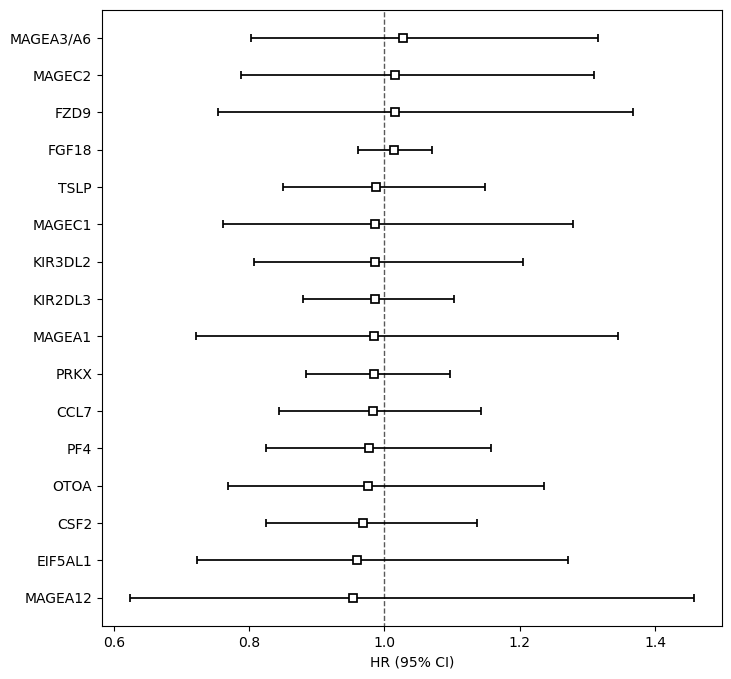

In [ ]:
max_genes = list(cph_l2.hazard_ratios_[cph_l2.hazard_ratios_ < 0.99].sort_values(ascending=False).index)
min_genes = list(cph_l2.hazard_ratios_[cph_l2.hazard_ratios_ > 1.01].sort_values(ascending=False).index)
hr_diff_genes = min_genes+max_genes

plt.figure(figsize=(8, 8))
cph_l2.plot(columns=hr_diff_genes, hazard_ratios=True)

plt.savefig('/media/sciobiome/Ventoy/assets/impactful_genes_hazard_ratio.png', dpi=300)

In [ ]:
cph_l2.print_summary()


<lifelines.CoxPHFitter: fitted with 20 total observations, 12 right-censored observations>
             duration col = 'surv_days'
                event col = 'death'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 20
number of events observed = 8
   partial log-likelihood = -42.34
         time fit was run = 2023-04-18 08:51:50 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
A2M        -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
ACVR1C     -0.00       1.00       0.05            -0.10             0.10                 0.90                 1.10
ADAM12     -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
ADGRE1      0.00       1.00       0.02            -0.03             0.03                 0.97                 1.04
ADM        -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
ADORA2A    -0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
AKT1        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
ALDOA       0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
ALDOC      -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
ANGPT1      0.00       1.00       0.01            -0.01             0.01                 0.99                 1.01
ANGPT2     -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
ANGPTL4    -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
ANLN        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
APC         0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
APH1B       0.00       1.00       0.01            -0.03             0.03                 0.97                 1.03
API5        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
APLNR      -0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
APOE        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
APOL6      -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
AQP9       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
AREG       -0.00       1.00       0.01            -0.01             0.01                 0.99                 1.01
ARG1       -0.00       1.00       0.08            -0.16             0.15                 0.85                 1.17
ARG2       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
ARID1A     -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
ARNT2       0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
ATF3       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
ATM        -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
AXIN1       0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
AXL         0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
B2M        -0.0

In [ ]:
train['FZD9']

172    -3.824505
165    -4.187753
136     0.762296
162     3.294914
129    -0.107931
167   -11.242271
151    -0.773170
188     5.135110
163     0.755640
119     1.838373
189    -3.794095
145     9.979403
161    -6.413933
159    -0.719864
171    -3.002105
166     0.728013
113     0.039433
146    -4.360849
156    -1.067080
173    -2.027308
Name: FZD9, dtype: float64

MAGEA3/A6


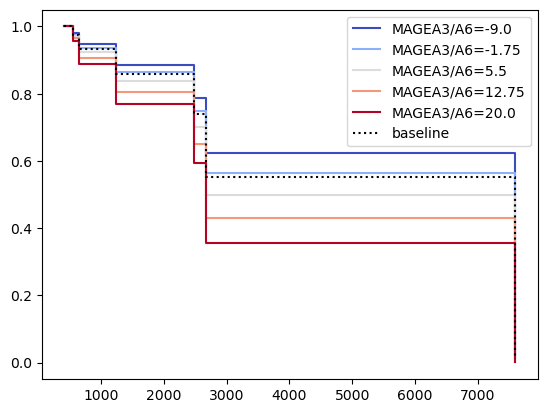

MAGEC2


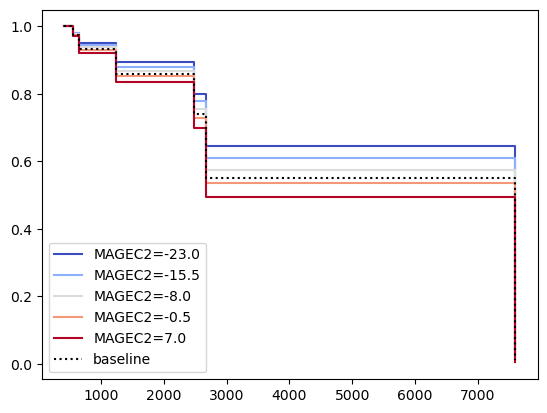

FZD9


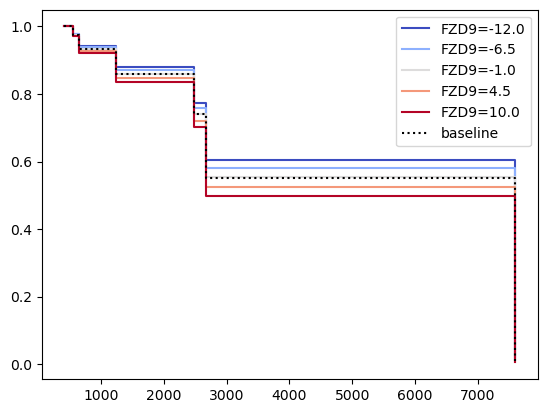

FGF18


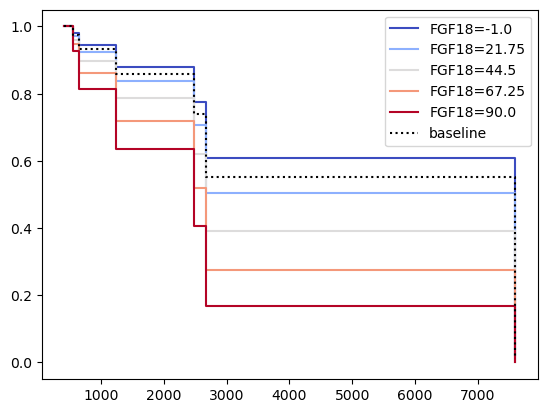

TSLP


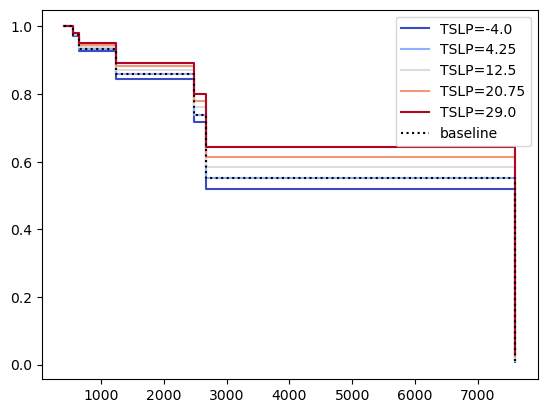

MAGEC1


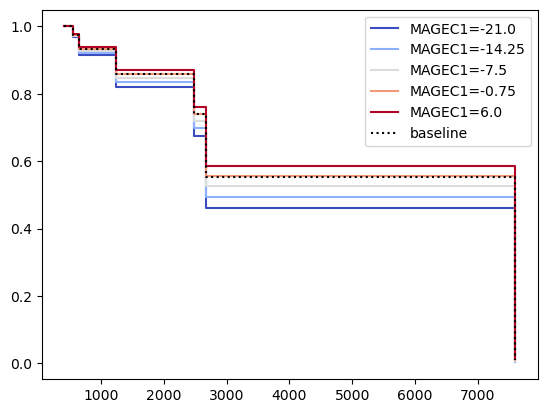

KIR3DL2


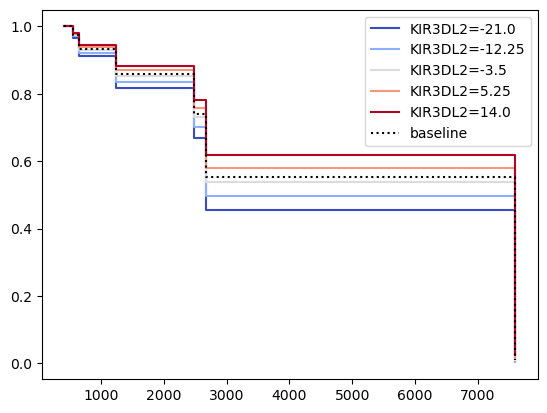

KIR2DL3


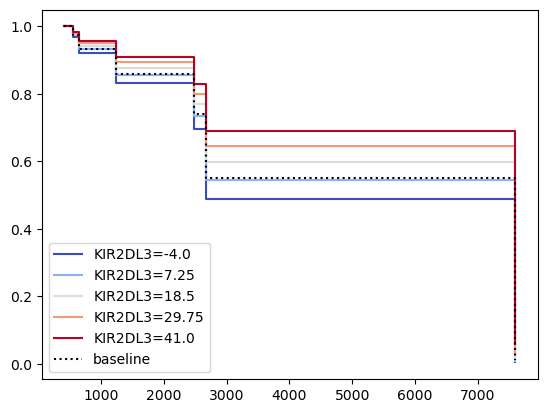

MAGEA1


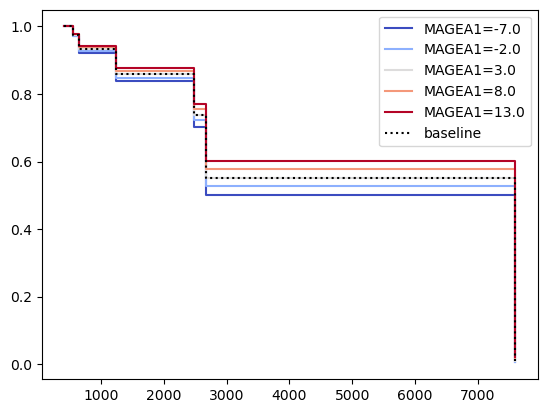

PRKX


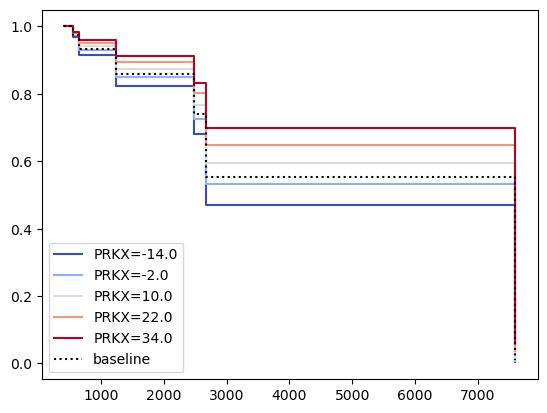

CCL7


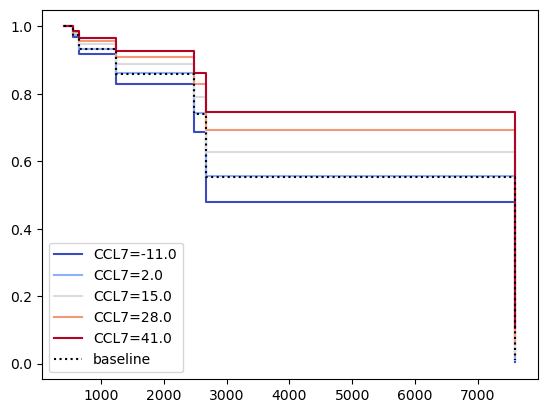

PF4


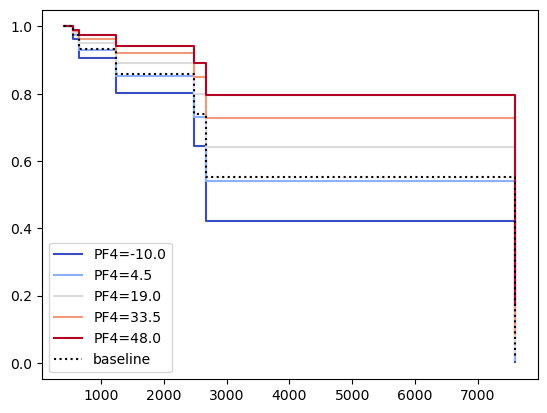

OTOA


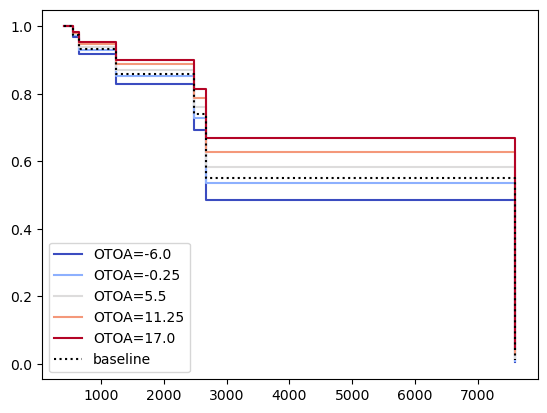

CSF2


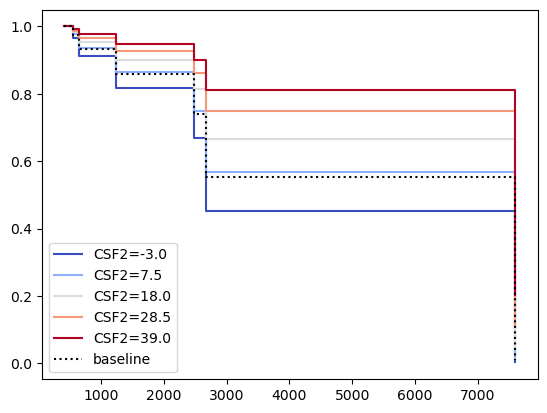

EIF5AL1


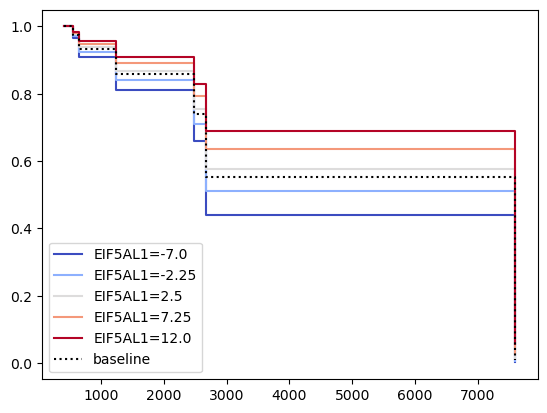

MAGEA12


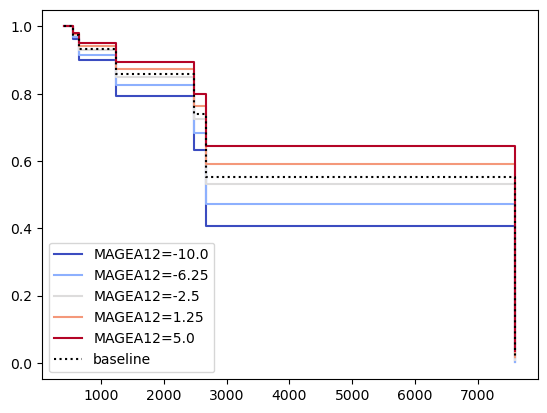

In [ ]:
import numpy as np

for gene in hr_diff_genes:
    print(gene)
    cph_l2.plot_partial_effects_on_outcome(
        covariates=gene, values=np.linspace(int(data[gene].min())-1, int(data[gene].max())+1, num=5), cmap="coolwarm"
    )
    plt.show()
    plt.savefig(f'/media/sciobiome/Ventoy/assets/impact_change_{gene}.png', dpi=300)

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 20 total observations, 12 right-censored observations>
         test_name = proportional_hazard_test

---
                test_statistic      p  -log2(p)
A2M       km              0.67   0.41      1.28
          rank            1.74   0.19      2.42
ACVR1C    km              0.17   0.68      0.55
          rank            0.43   0.51      0.97
ADAM12    km              0.21   0.65      0.62
          rank            0.52   0.47      1.09
ADGRE1    km              0.26   0.61      0.72
          rank            0.72   0.40      1.34
ADM       km              0.52   0.47      1.08
          rank            1.40   0.24      2.08
ADORA2A   km              0.06   0.81      0.30
          rank            0.14   0.71      0.50
AKT1      km              0.69   0.40      1.30
          rank            1.78   0.18      2.46
ALDOA     km              0.97   0.33      1.62
          rank            2.50   0.11      3.14
ALDOC     km              1.26   0.26      1.93
          rank            3.39   0.07      3.93
ANGPT1    km              0.02   0.88      0.19
          rank            0.06   0.80      0.31
ANGPT2    km              0.66   0.42      1.26
          rank            1.78   0.18      2.46
ANGPTL4   km              1.21   0.27      1.88
          rank            3.16   0.08      3.72
ANLN      km              0.01   0.90      0.15
          rank            0.04   0.84      0.25
APC       km              0.79   0.38      1.41
          rank            2.02   0.16      2.68
APH1B     km              1.22   0.27      1.89
          rank            3.13   0.08      3.70
API5      km              0.07   0.79      0.35
          rank            0.19   0.67      0.59
APLNR     km              0.07   0.80      0.33
          rank            0.19   0.66      0.59
APOE      km              5.32   0.02      5.56
          rank           13.79 <0.005     12.26
APOL6     km              0.01   0.93      0.10
          rank            0.02   0.89      0.16
AQP9      km              0.31   0.58      0.79
          rank            0.82   0.37      1.45
AREG      km              2.02   0.16      2.68
          rank            5.22   0.02      5.48
ARG1      km              1.64   0.20      2.32
          rank            4.31   0.04      4.72
ARG2      km              0.65   0.42      1.25
          rank            1.67   0.20      2.35
ARID1A    km              0.01   0.93      0.11
          rank            0.02   0.88      0.18
ARNT2     km              1.15   0.28      1.82
          rank            2.96   0.09      3.55
ATF3      km              1.32   0.25      2.00
          rank            3.30   0.07      3.85
ATM       km              0.00   0.98      0.03
          rank            0.00   0.97      0.05
AXIN1     km              2.54   0.11      3.18
          rank            6.60   0.01      6.62
AXL       km              0.13   0.72      0.48
          rank            0.32   0.57      0.80
B2M       km              0.37   0.54      0.89
          rank            0.97   0.32      1.62
BAD       km              0.01   0.93      0.10
          rank            0.02   0.88      0.18
BAMBI     km              1.18   0.28      1.85
          rank            3.06   0.08      3.64
BATF3     km              0.02   0.89      0.17
          rank            0.06   0.81      0.30
BAX       km              1.36   0.24      2.04
          rank            3.53   0.06      4.06
BBC3      km              4.25   0.04      4.67
          rank           11.00 <0.005     10.10
BBS1      km              0.35   0.56      0.85
          rank            0.89   0.34      1.54
BCAT1     km              0.07   0.79      0.33
          rank            0.17   0.68      0.56
BCL2      km              2.82   0.09      3.42
          rank            7.22   0.01      7.11
BCL2L1    km              1.8



1. Variable 'APOE' failed the non-proportional test: p-value is 0.0002.

   Advice 1: the functional form of the variable 'APOE' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'APOE' using pd.cut, and then specify it in `strata=['APOE',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


2. Variable 'AXIN1' failed the non-proportional test: p-value is 0.0102.

   Advice 1: the functional form of the variable 'AXIN1' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] belo

/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=8.88178e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



4. Variable 'BCL2' failed the non-proportional test: p-value is 0.0072.

   Advice 1: the functional form of the variable 'BCL2' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'BCL2' using pd.cut, and then specify it in `strata=['BCL2',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


5. Variable 'C2' failed the non-proportional test: p-value is 0.0001.

   Advice 1: the functional form of the variable 'C2' might be incorrect. That is, there may be non-
linear terms missing. The proportional hazard test used is very sensitive to incorrect functional
forms. See documentation in link [D] below on h

/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=8.88178e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



8. Variable 'CCND2' failed the non-proportional test: p-value is 0.0098.

   Advice 1: the functional form of the variable 'CCND2' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'CCND2' using pd.cut, and then specify it in `strata=['CCND2',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


9. Variable 'CCNE1' failed the non-proportional test: p-value is 0.0136.

   Advice 1: the functional form of the variable 'CCNE1' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] b

/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=3.94746e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



13. Variable 'CDH1' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'CDH1' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'CDH1' using pd.cut, and then specify it in `strata=['CDH1',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


14. Variable 'CDK6' failed the non-proportional test: p-value is 0.0021.

   Advice 1: the functional form of the variable 'CDK6' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below

/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=4.02802e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)
/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=4.53152e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



15. Variable 'CDKN2A' failed the non-proportional test: p-value is 0.0001.

   Advice 1: the functional form of the variable 'CDKN2A' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'CDKN2A' using pd.cut, and then specify it in
`strata=['CDKN2A', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


16. Variable 'CNTFR' failed the non-proportional test: p-value is 0.0053.

   Advice 1: the functional form of the variable 'CNTFR' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link

/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=3.94746e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



19. Variable 'CST2' failed the non-proportional test: p-value is 0.0143.

   Advice 1: the functional form of the variable 'CST2' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'CST2' using pd.cut, and then specify it in `strata=['CST2',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...



/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=8.88178e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



20. Variable 'DLL1' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'DLL1' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'DLL1' using pd.cut, and then specify it in `strata=['DLL1',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


21. Variable 'E2F3' failed the non-proportional test: p-value is 0.0138.

   Advice 1: the functional form of the variable 'E2F3' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below

/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/fitters/mixins.py:192: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()
/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=8.88178e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



22. Variable 'EPCAM' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'EPCAM' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'EPCAM' using pd.cut, and then specify it in `strata=['EPCAM',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


23. Variable 'ERBB2' failed the non-proportional test: p-value is 0.0026.

   Advice 1: the functional form of the variable 'ERBB2' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D]

/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=4.02802e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



25. Variable 'FGF13' failed the non-proportional test: p-value is 0.0088.

   Advice 1: the functional form of the variable 'FGF13' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'FGF13' using pd.cut, and then specify it in `strata=['FGF13',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


26. Variable 'FYN' failed the non-proportional test: p-value is 0.0001.

   Advice 1: the functional form of the variable 'FYN' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] bel

/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=8.88178e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



27. Variable 'GNG4' failed the non-proportional test: p-value is 0.0008.

   Advice 1: the functional form of the variable 'GNG4' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'GNG4' using pd.cut, and then specify it in `strata=['GNG4',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


28. Variable 'GOT1' failed the non-proportional test: p-value is 0.0015.

   Advice 1: the functional form of the variable 'GOT1' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below

/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=5.2468e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



31. Variable 'ICOSLG' failed the non-proportional test: p-value is 0.0001.

   Advice 1: the functional form of the variable 'ICOSLG' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'ICOSLG' using pd.cut, and then specify it in
`strata=['ICOSLG', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


32. Variable 'ID4' failed the non-proportional test: p-value is 0.0048.

   Advice 1: the functional form of the variable 'ID4' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D]

/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=3.94746e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)
/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=5.2468e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



35. Variable 'IHH' failed the non-proportional test: p-value is 0.0038.

   Advice 1: the functional form of the variable 'IHH' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'IHH' using pd.cut, and then specify it in `strata=['IHH',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


36. Variable 'IL2' failed the non-proportional test: p-value is 0.0020.

   Advice 1: the functional form of the variable 'IL2' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on ho

/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=3.94746e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



43. Variable 'LY96' failed the non-proportional test: p-value is 0.0002.

   Advice 1: the functional form of the variable 'LY96' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'LY96' using pd.cut, and then specify it in `strata=['LY96',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


44. Variable 'MAGEA12' failed the non-proportional test: p-value is 0.0064.

   Advice 1: the functional form of the variable 'MAGEA12' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D]

/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=4.53152e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)
/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=8.88178e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)
/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=2.86731e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)
/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=4.02802e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



47. Variable 'MLANA' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'MLANA' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'MLANA' using pd.cut, and then specify it in `strata=['MLANA',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


48. Variable 'MYC' failed the non-proportional test: p-value is 0.0012.

   Advice 1: the functional form of the variable 'MYC' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] bel

/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=4.02802e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)
/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=5.2468e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



49. Variable 'NCAM1' failed the non-proportional test: p-value is 0.0003.

   Advice 1: the functional form of the variable 'NCAM1' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'NCAM1' using pd.cut, and then specify it in `strata=['NCAM1',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


50. Variable 'NECTIN1' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'NECTIN1' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link

/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=2.46716e-17): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



57. Variable 'PIK3R2' failed the non-proportional test: p-value is 0.0011.

   Advice 1: the functional form of the variable 'PIK3R2' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'PIK3R2' using pd.cut, and then specify it in
`strata=['PIK3R2', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


58. Variable 'PLA1A' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'PLA1A' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link

/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=8.88178e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)
/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=2.86731e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



71. Variable 'RPL7A' failed the non-proportional test: p-value is 0.0001.

   Advice 1: the functional form of the variable 'RPL7A' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'RPL7A' using pd.cut, and then specify it in `strata=['RPL7A',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


72. Variable 'RPTOR' failed the non-proportional test: p-value is 0.0141.

   Advice 1: the functional form of the variable 'RPTOR' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D]

/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=9.63735e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



73. Variable 'SGK1' failed the non-proportional test: p-value is 0.0058.

   Advice 1: the functional form of the variable 'SGK1' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'SGK1' using pd.cut, and then specify it in `strata=['SGK1',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


74. Variable 'SHC2' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'SHC2' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below

/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=3.94746e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



77. Variable 'SPP1' failed the non-proportional test: p-value is 0.0005.

   Advice 1: the functional form of the variable 'SPP1' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'SPP1' using pd.cut, and then specify it in `strata=['SPP1',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


78. Variable 'STAT1' failed the non-proportional test: p-value is 0.0012.

   Advice 1: the functional form of the variable 'STAT1' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] bel

/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=4.53152e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



79. Variable 'THY1' failed the non-proportional test: p-value is 0.0115.

   Advice 1: the functional form of the variable 'THY1' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'THY1' using pd.cut, and then specify it in `strata=['THY1',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


80. Variable 'TNFRSF10B' failed the non-proportional test: p-value is 0.0050.

   Advice 1: the functional form of the variable 'TNFRSF10B' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link

/home/sklein/mambaforge/envs/sklein/lib/python3.10/site-packages/lifelines/utils/lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=5.2468e-18): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



87. Variable 'ZC3H12A' failed the non-proportional test: p-value is 0.0088.

   Advice 1: the functional form of the variable 'ZC3H12A' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'ZC3H12A' using pd.cut, and then specify it in
`strata=['ZC3H12A', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_

[[<Axes: xlabel='rank-transformed time\n(p=0.0002)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0211)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0102)'>,
  <Axes: xlabel='km-transformed time\n(p=0.1107)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0009)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0393)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0072)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0932)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0001)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0183)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0000)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0110)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0089)'>,
  <Axes: xlabel='km-transformed time\n(p=0.1032)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0098)'>,
  <Axes: xlabel='km-transformed time\n(p=0.1091)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0136)'>,
  <Axes: xlabel='km-transformed time\n(p=0.1252)'>],
 [<Axes: xlabel='rank-transformed tim

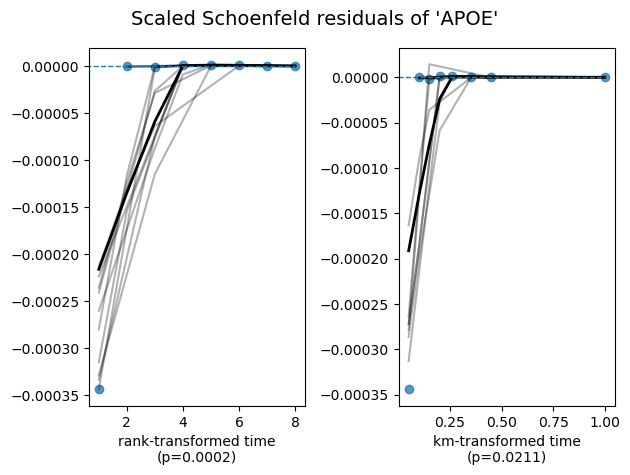

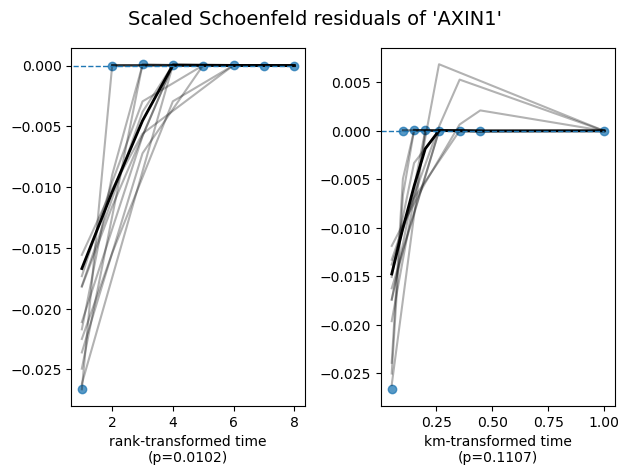

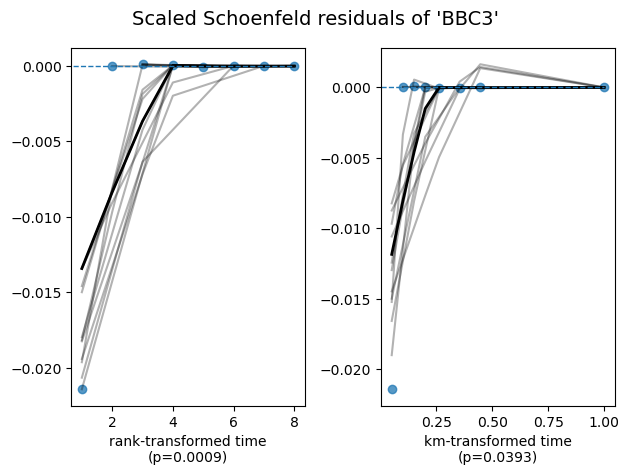

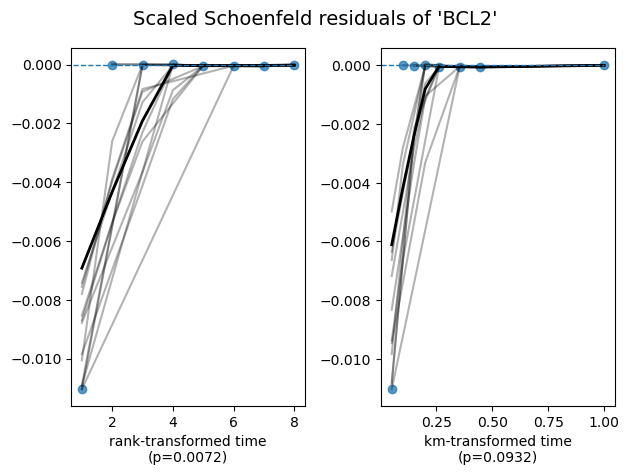

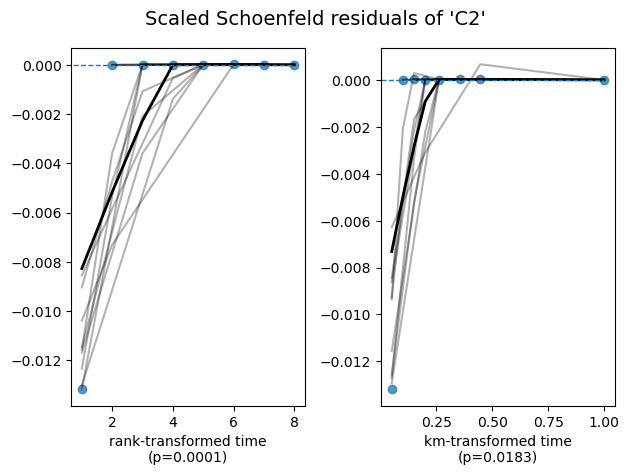

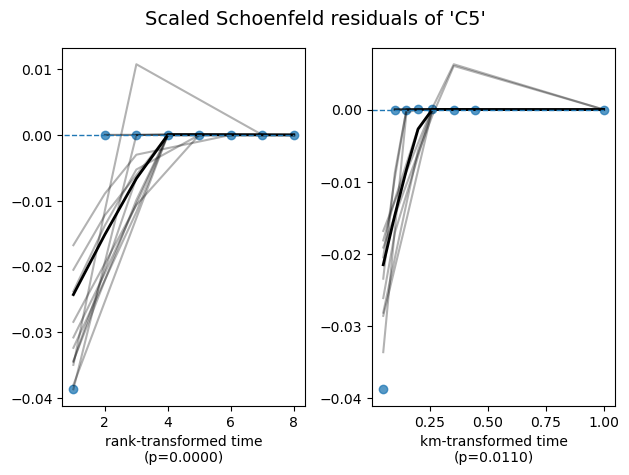

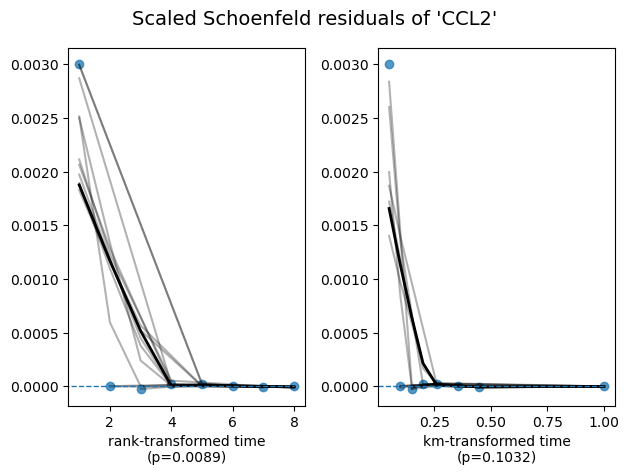

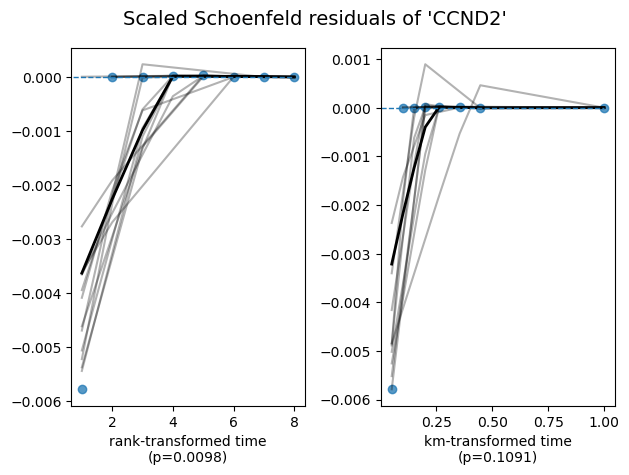

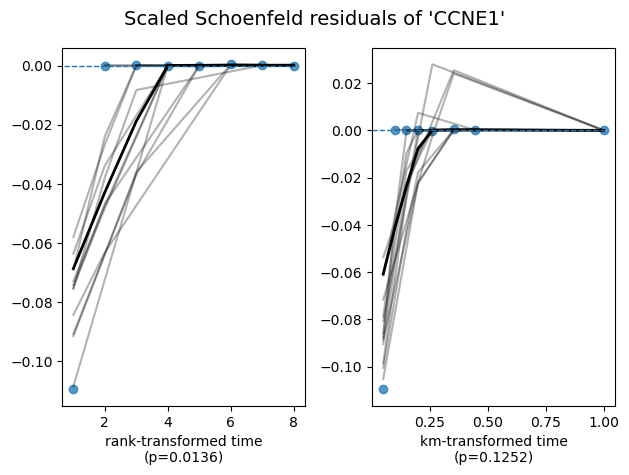

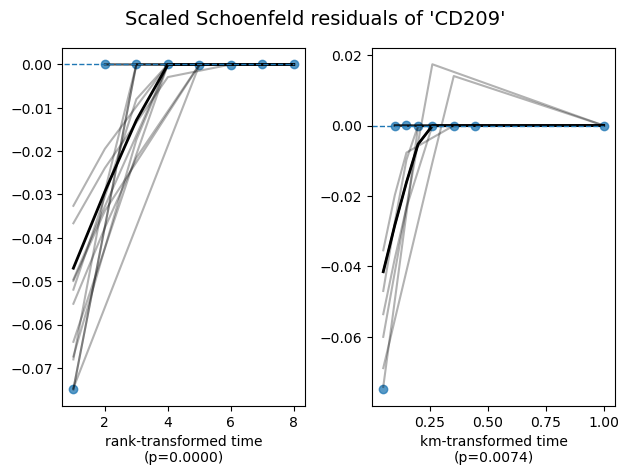

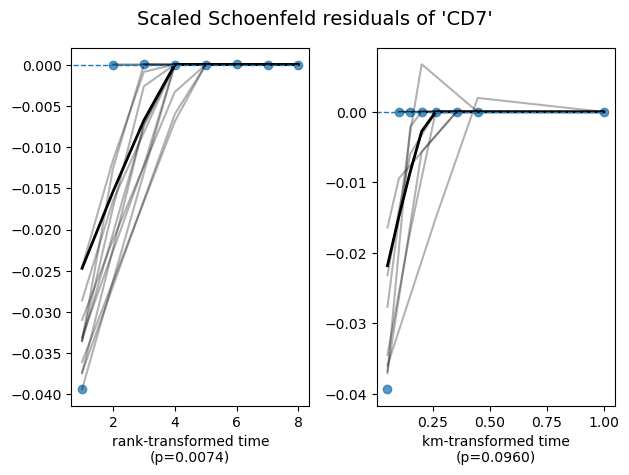

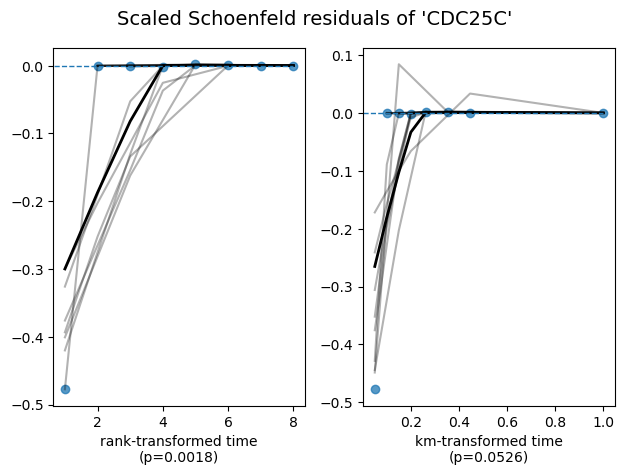

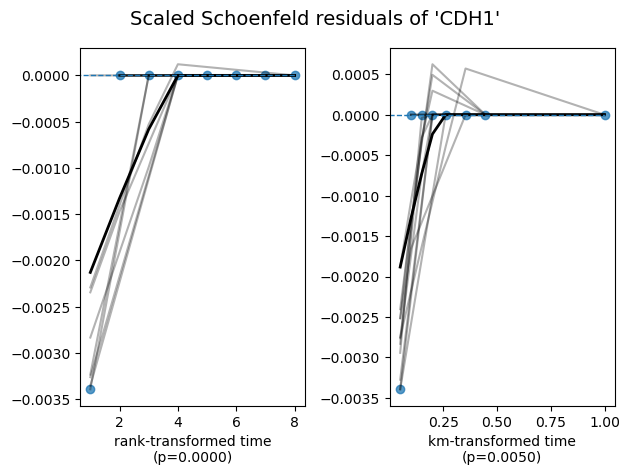

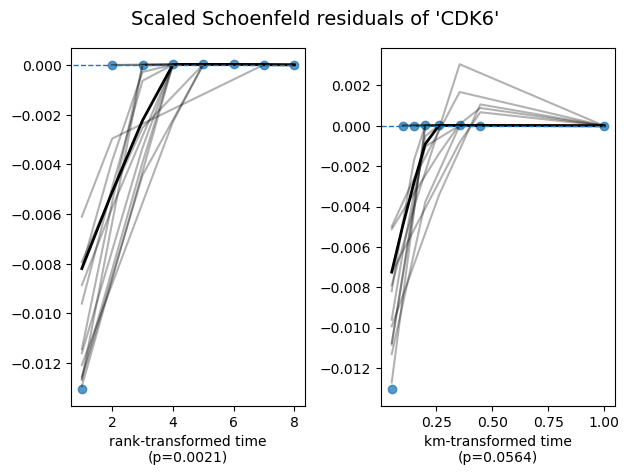

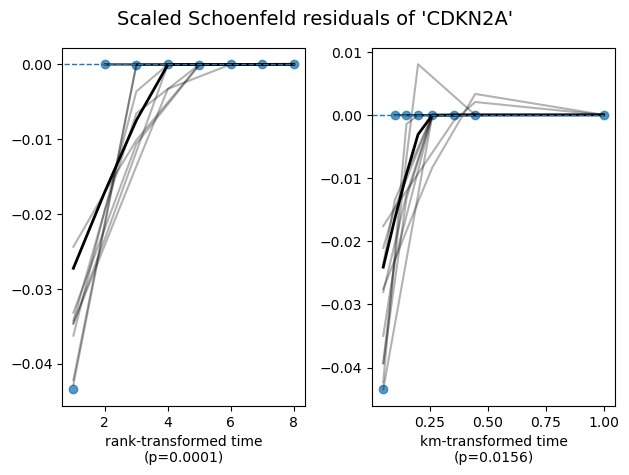

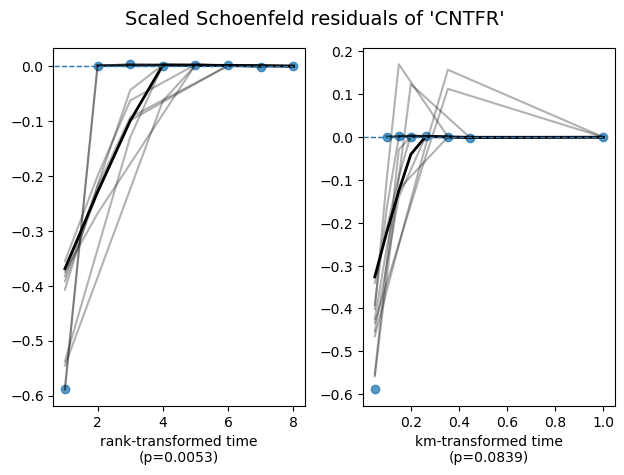

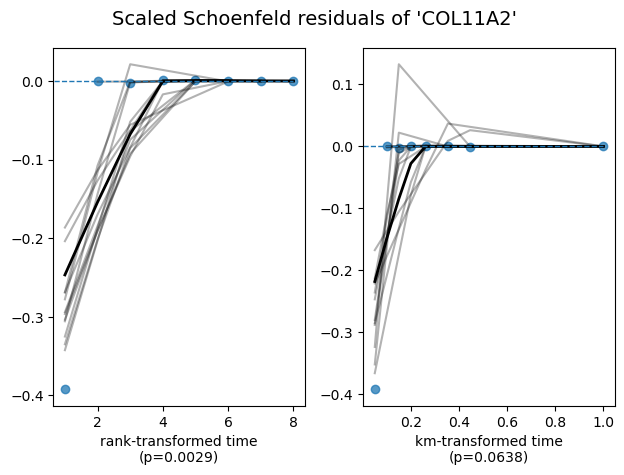

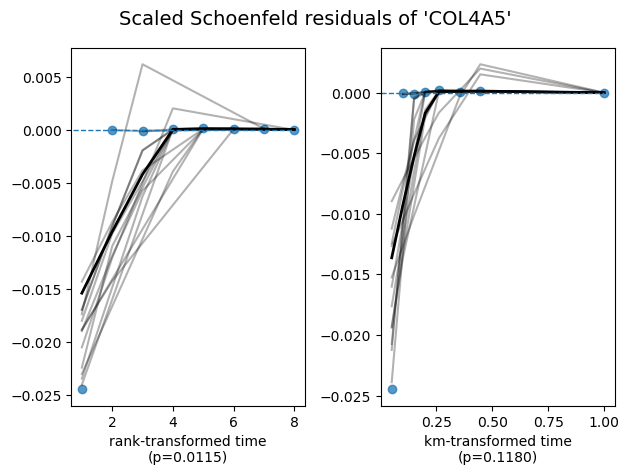

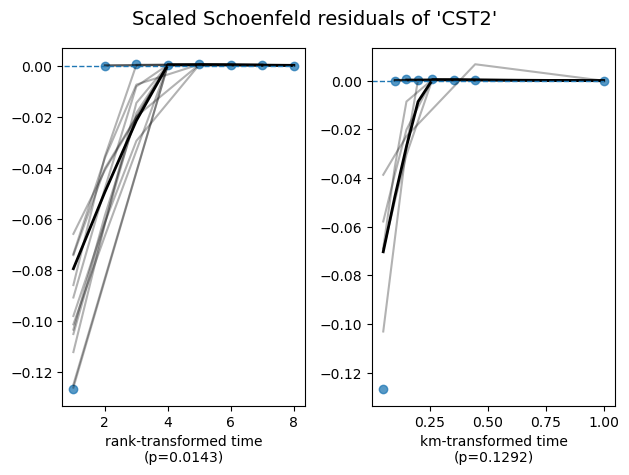

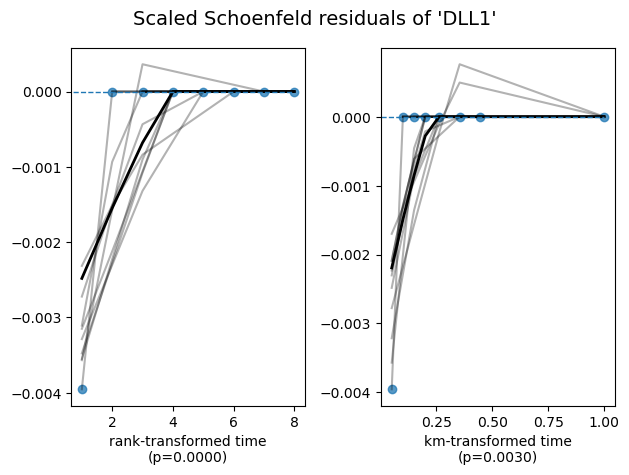

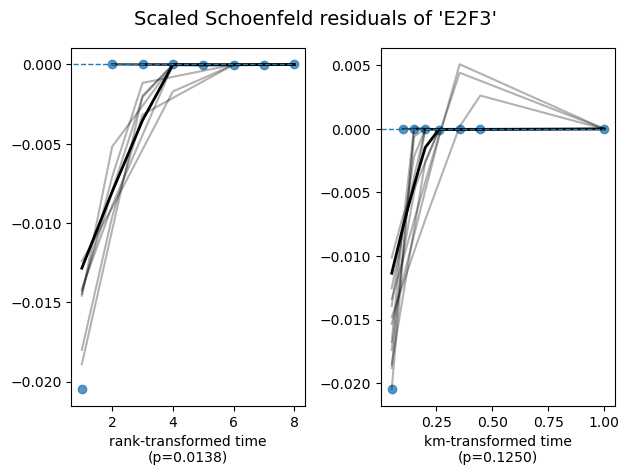

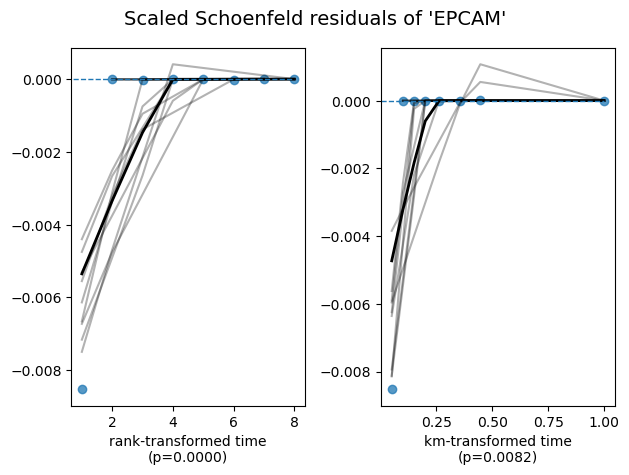

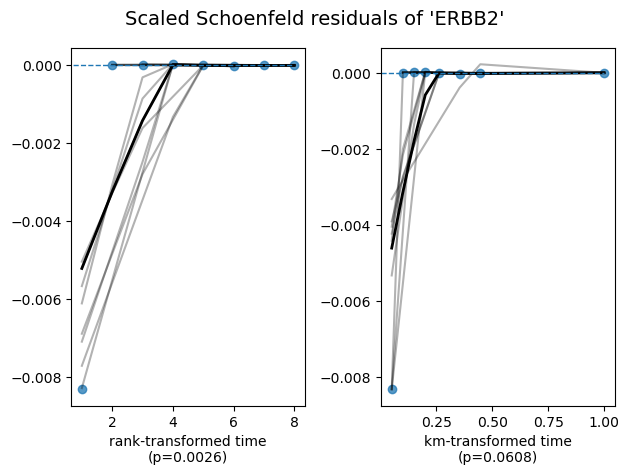

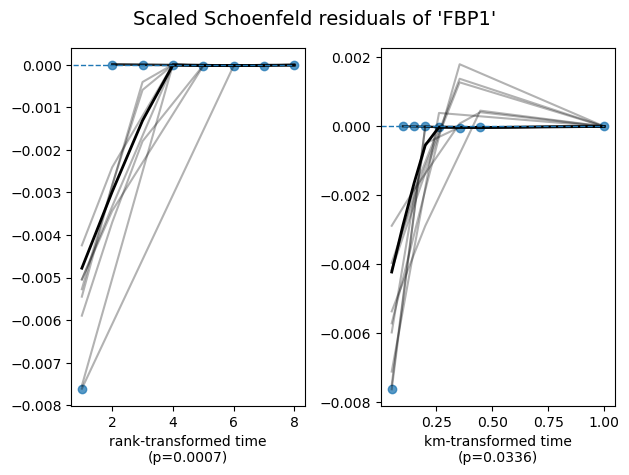

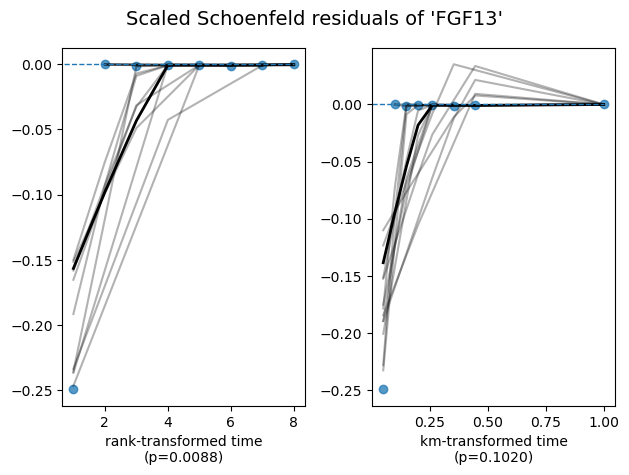

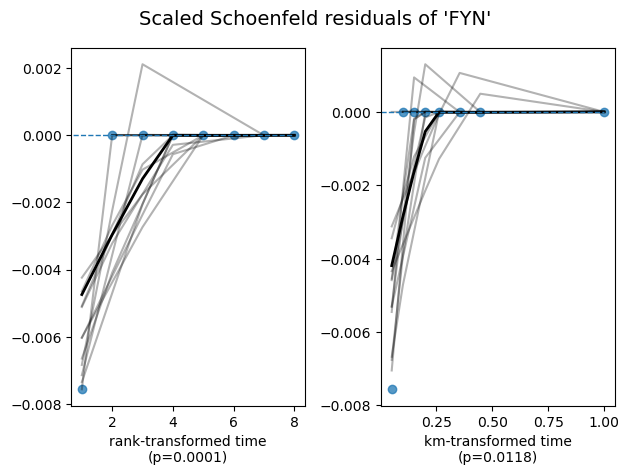

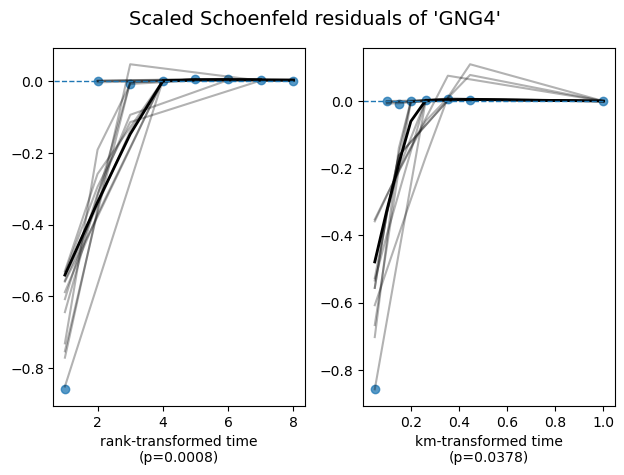

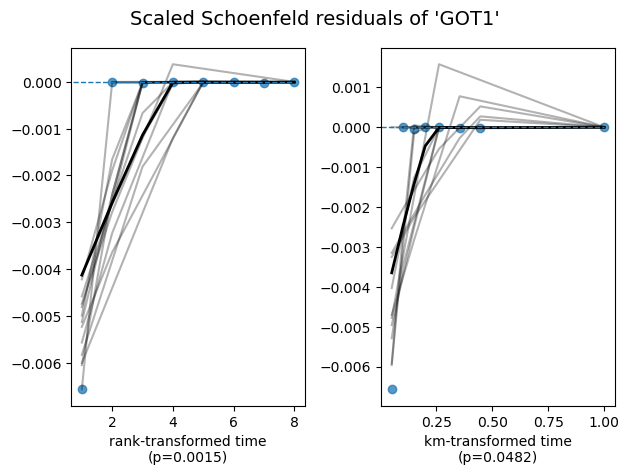

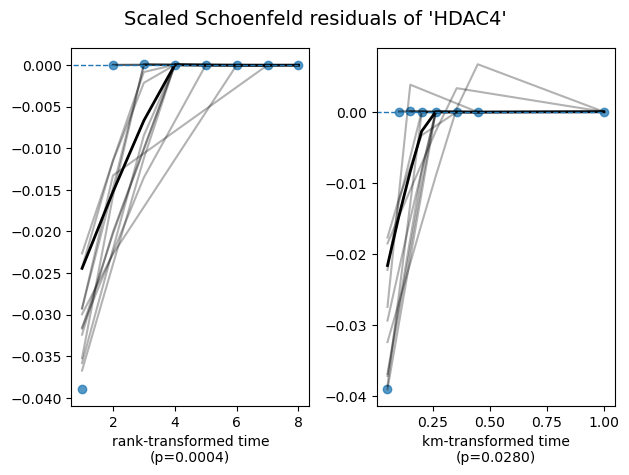

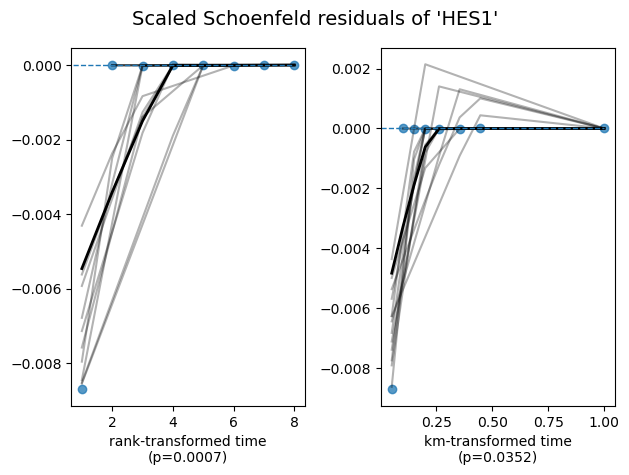

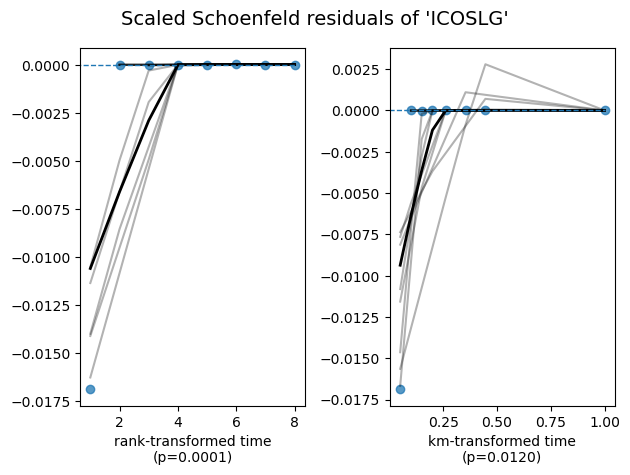

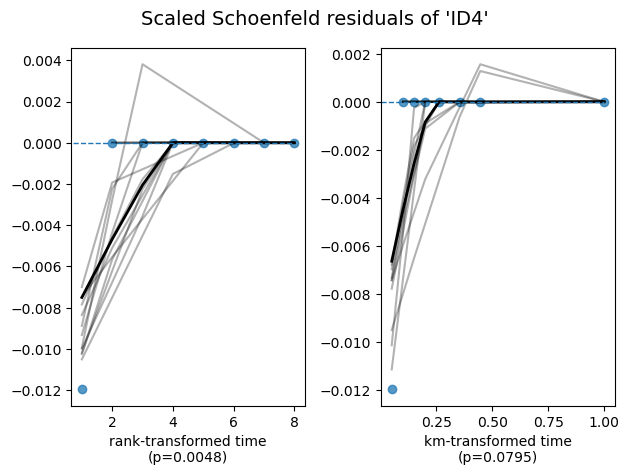

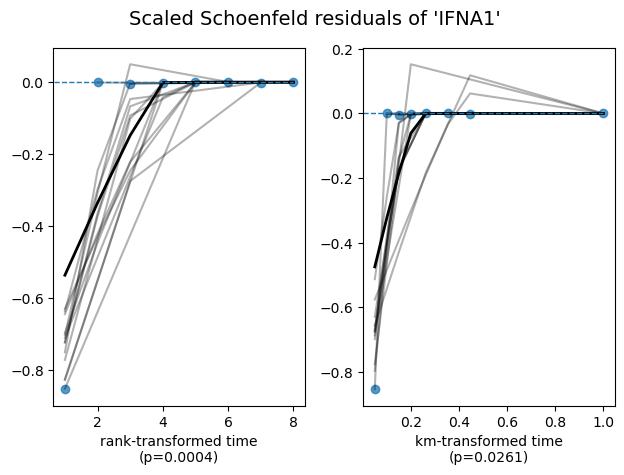

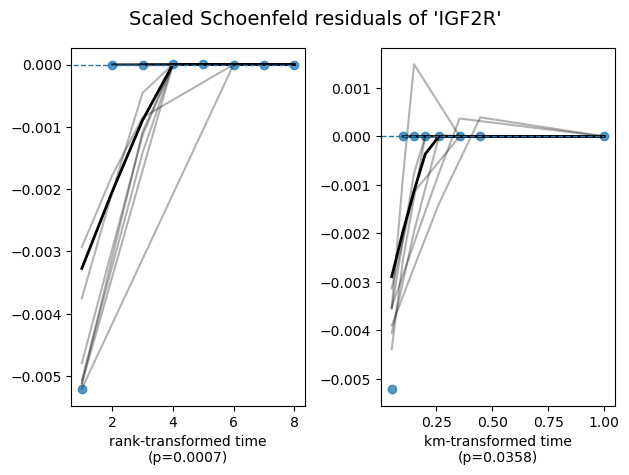

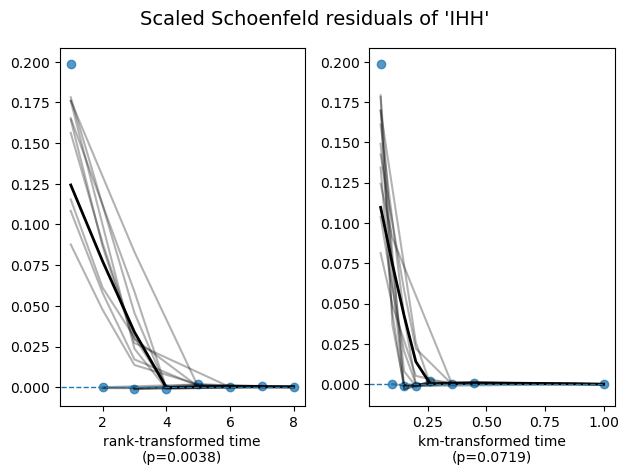

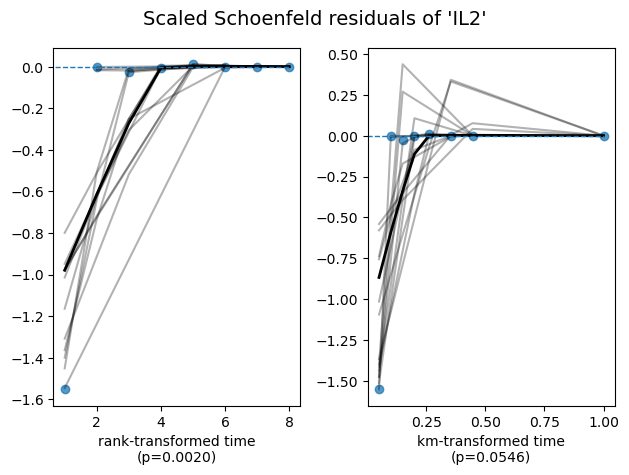

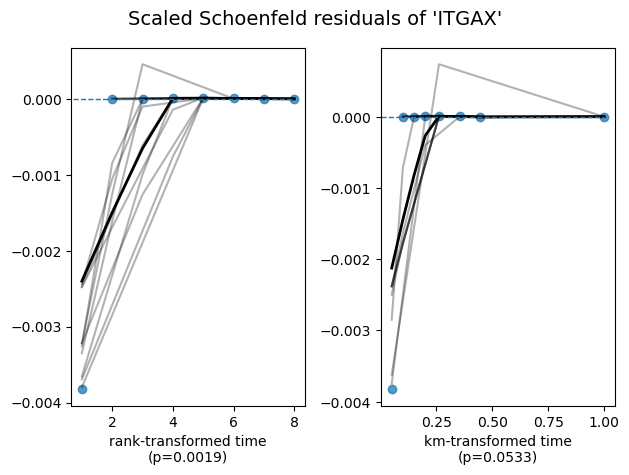

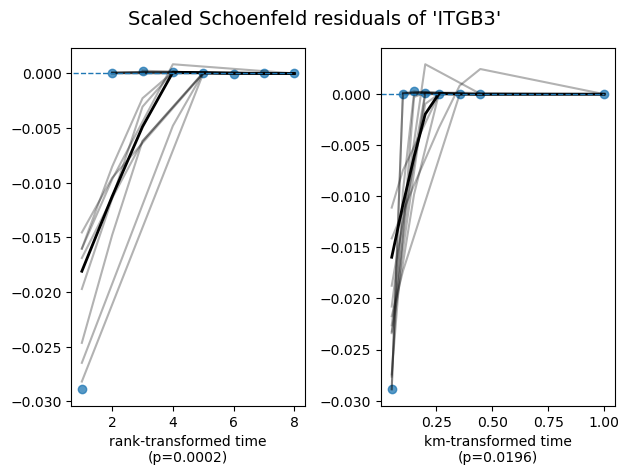

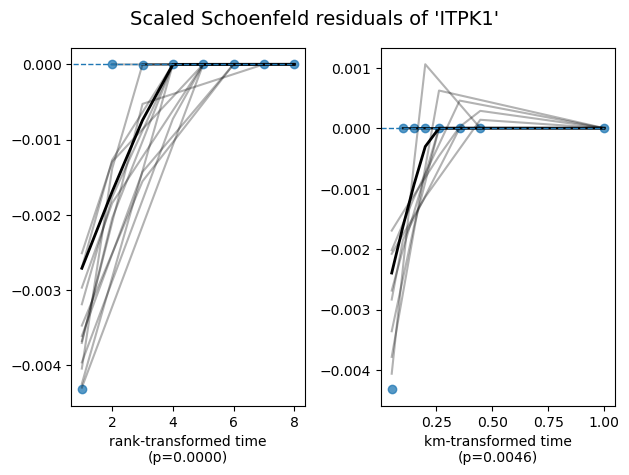

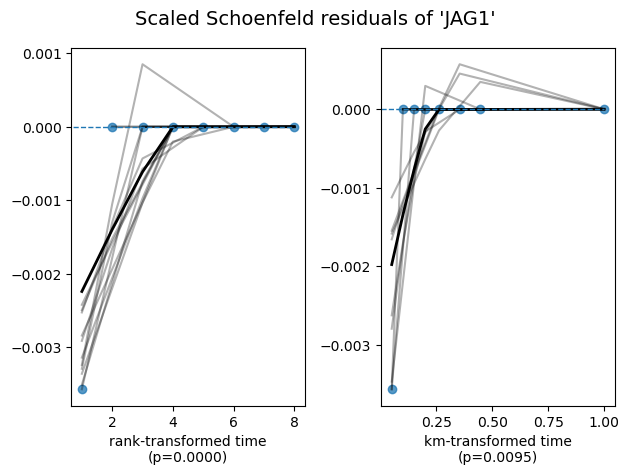

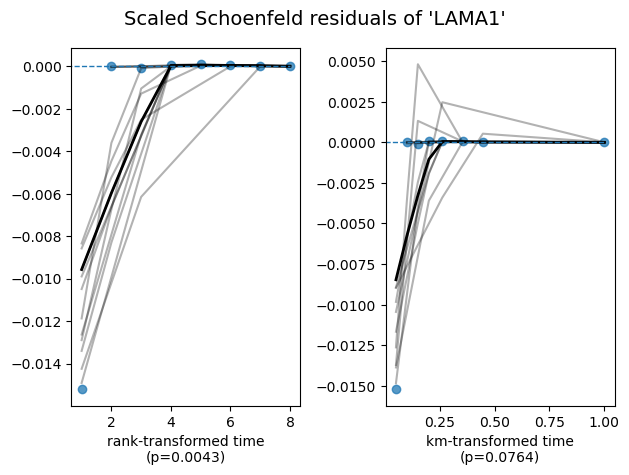

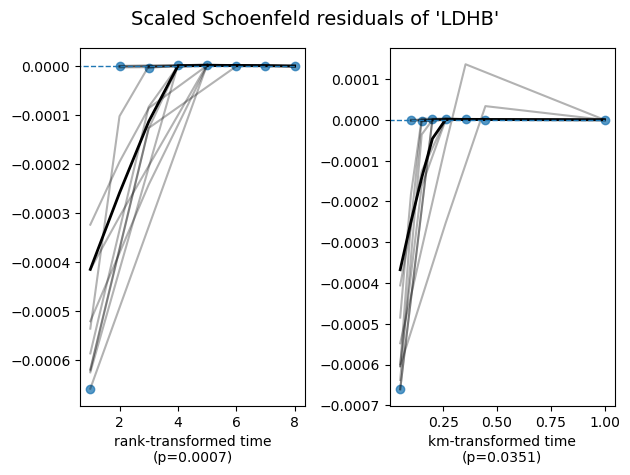

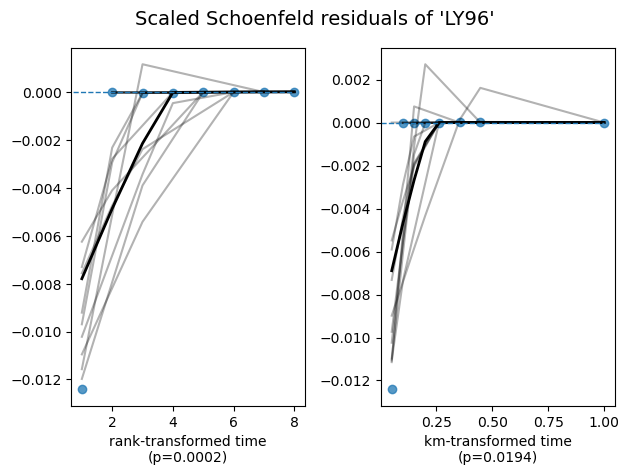

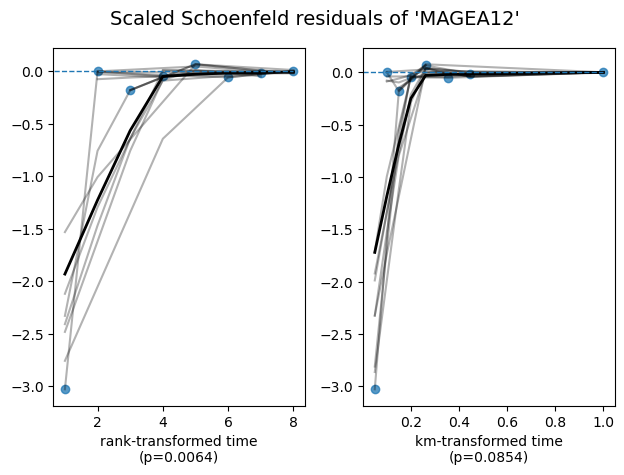

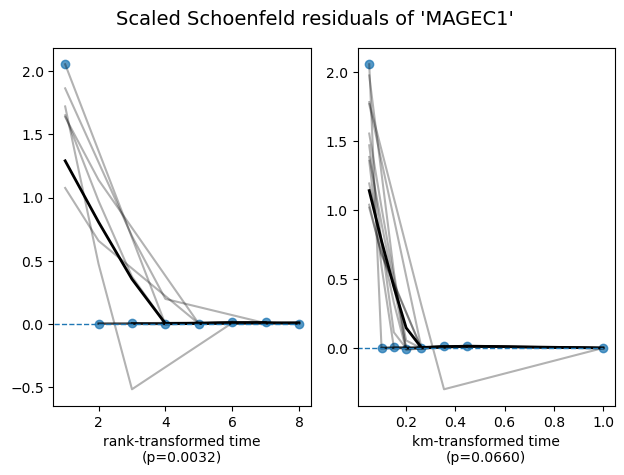

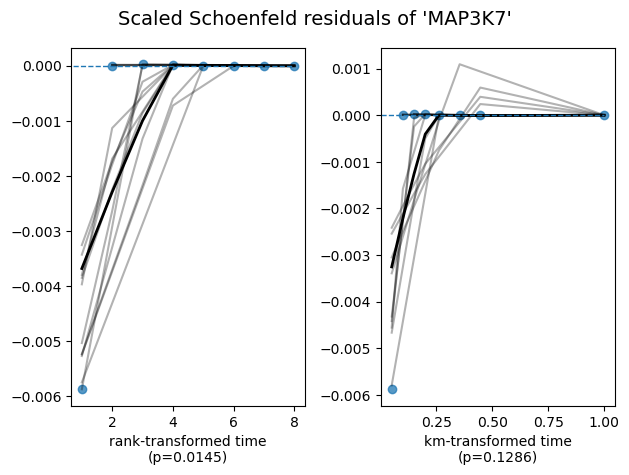

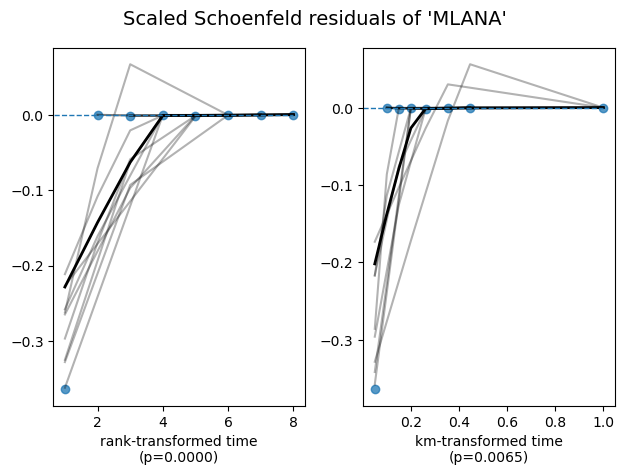

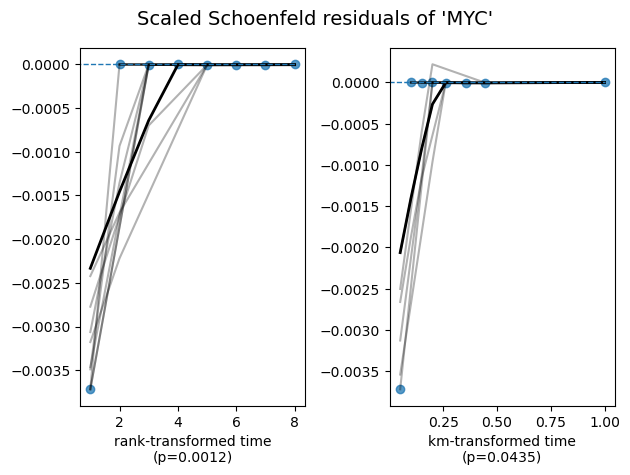

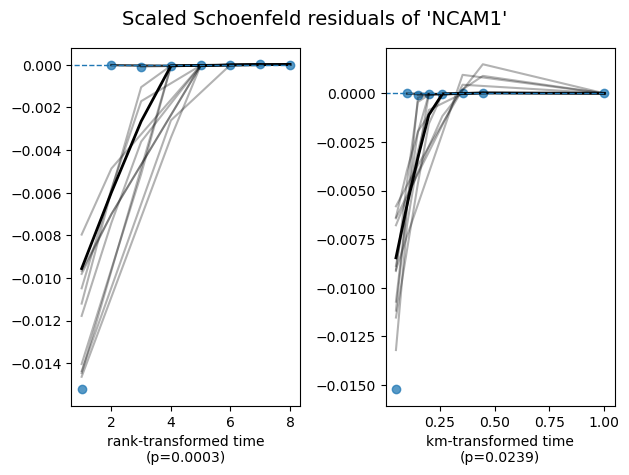

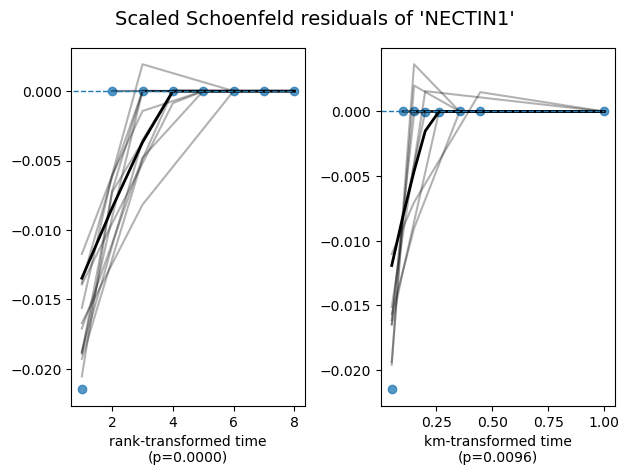

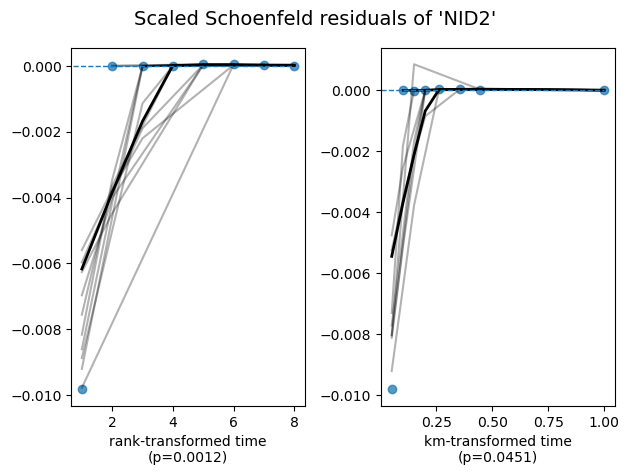

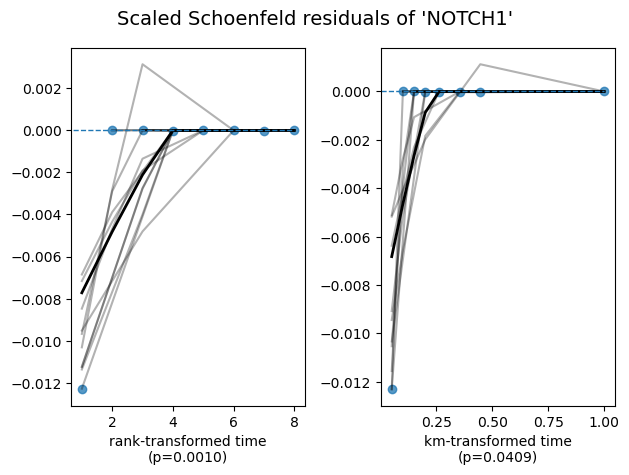

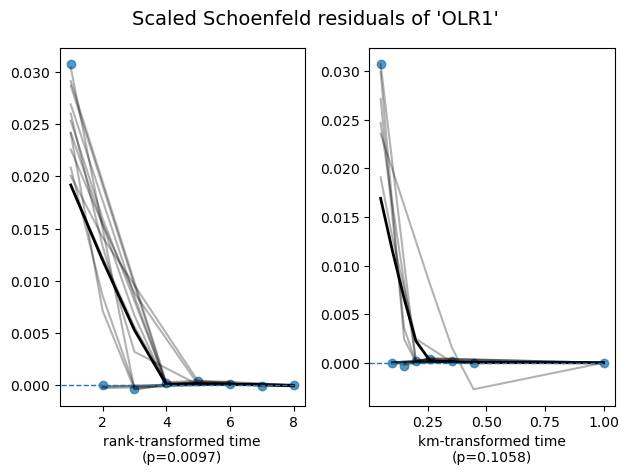

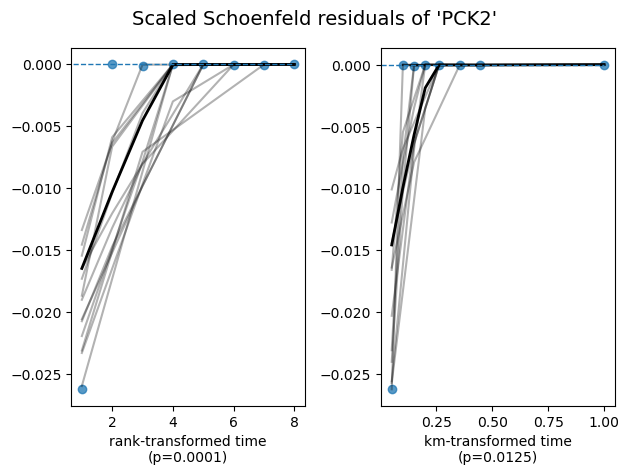

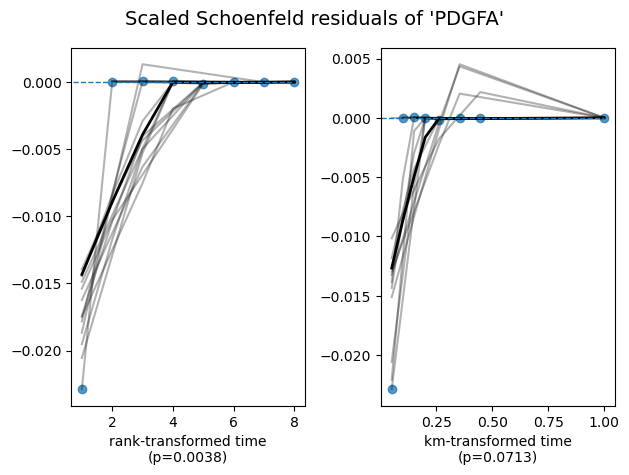

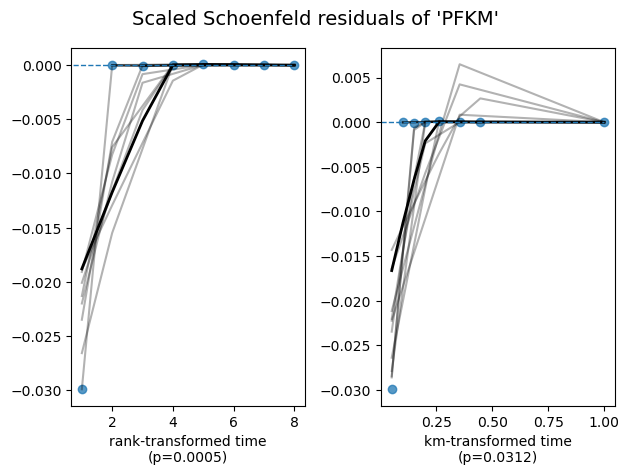

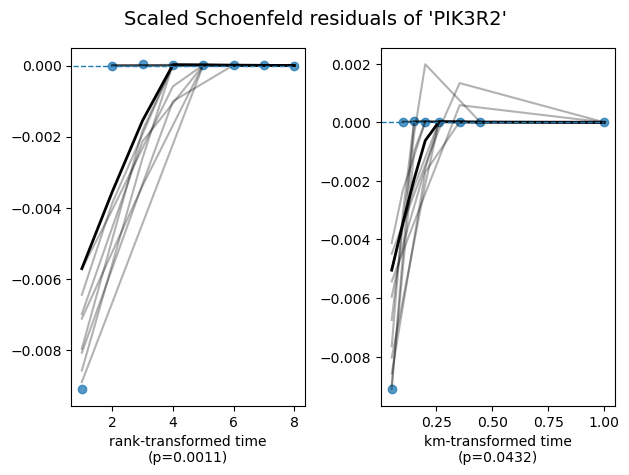

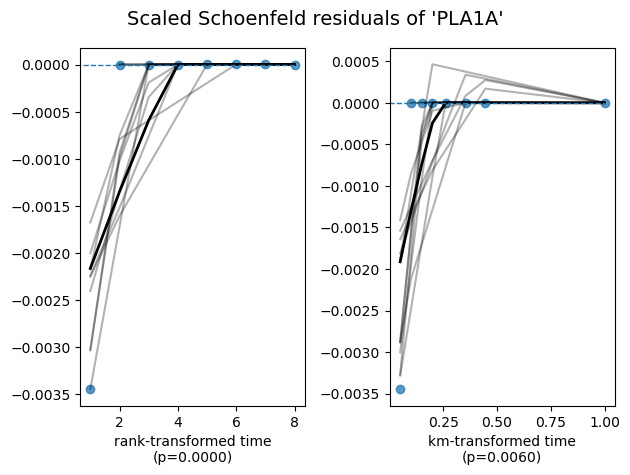

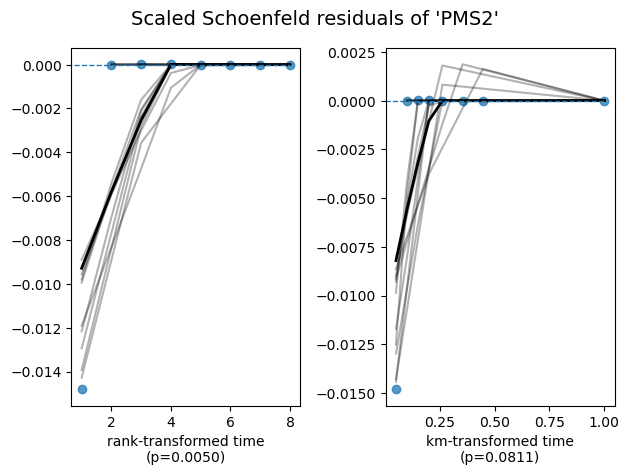

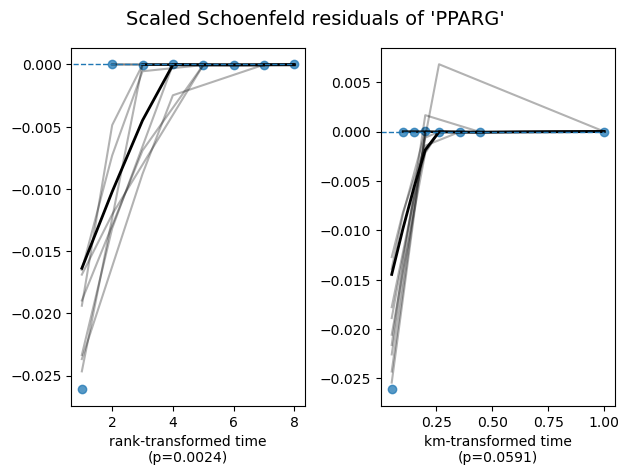

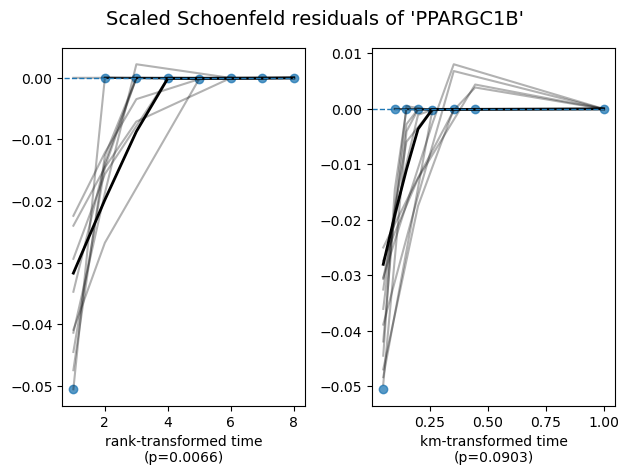

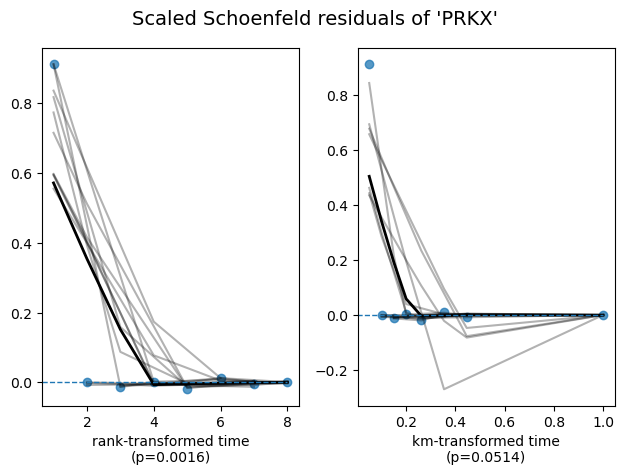

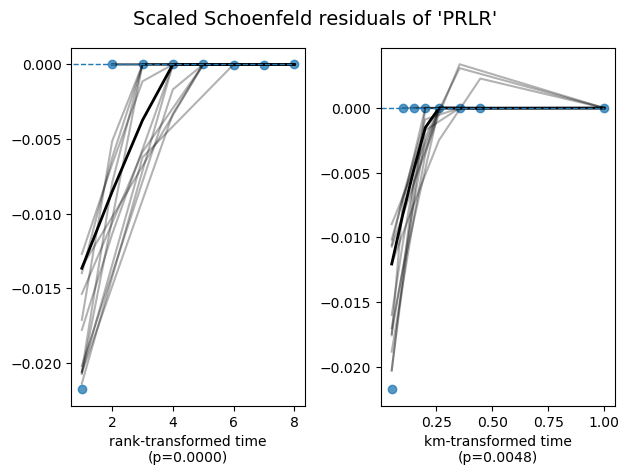

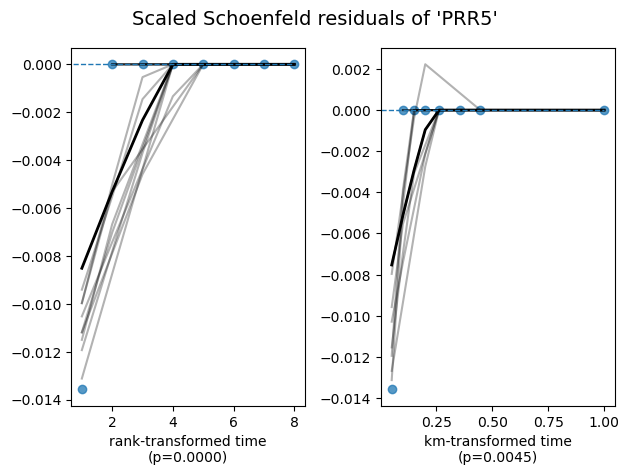

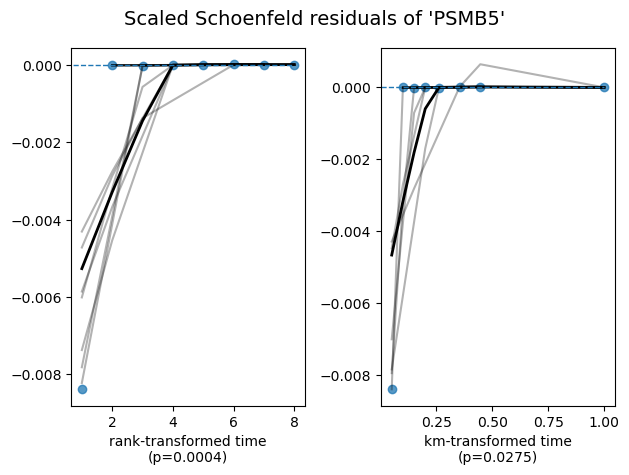

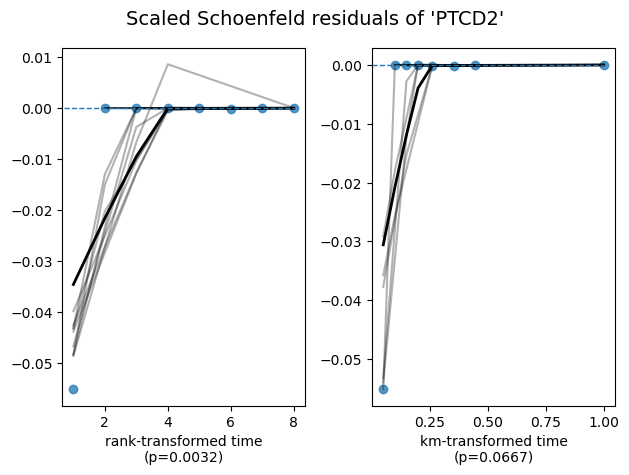

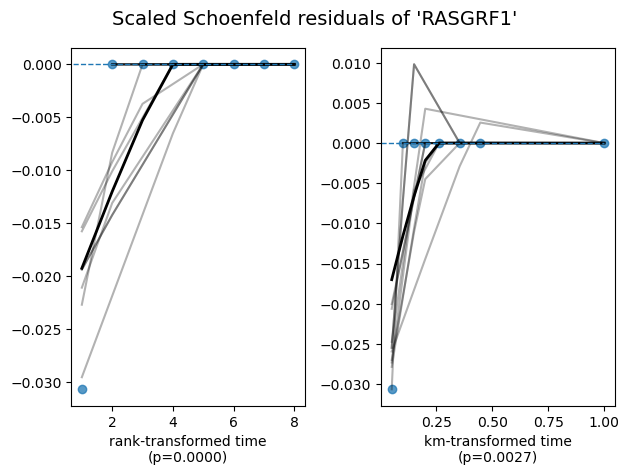

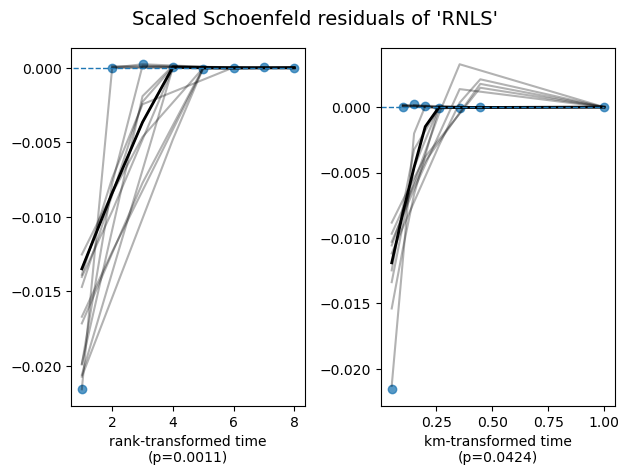

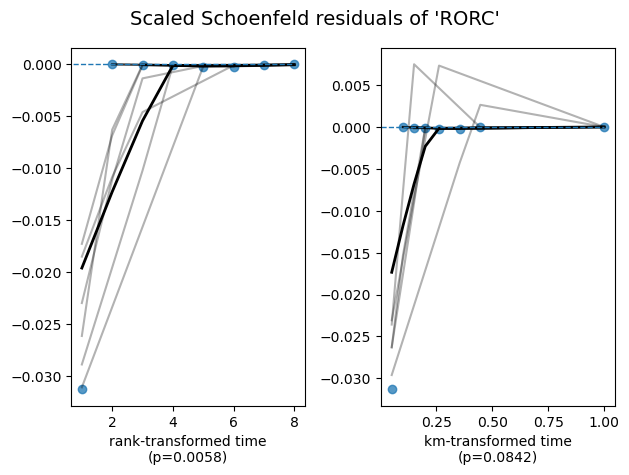

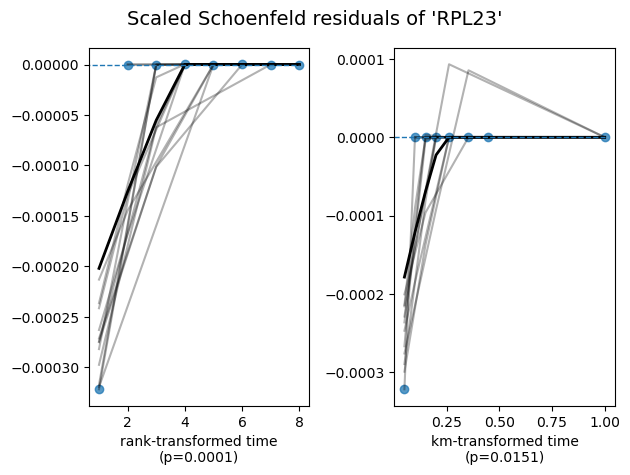

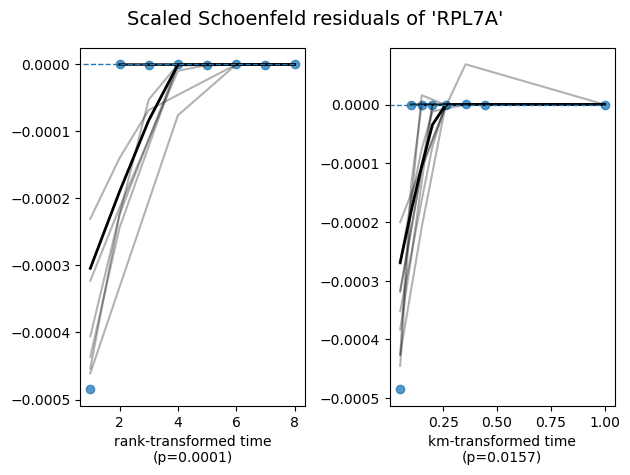

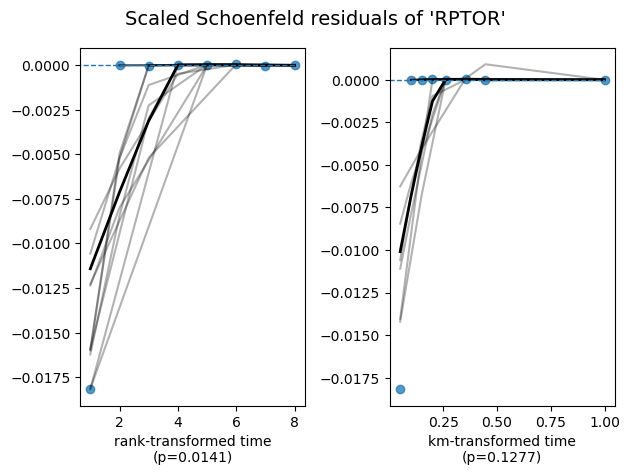

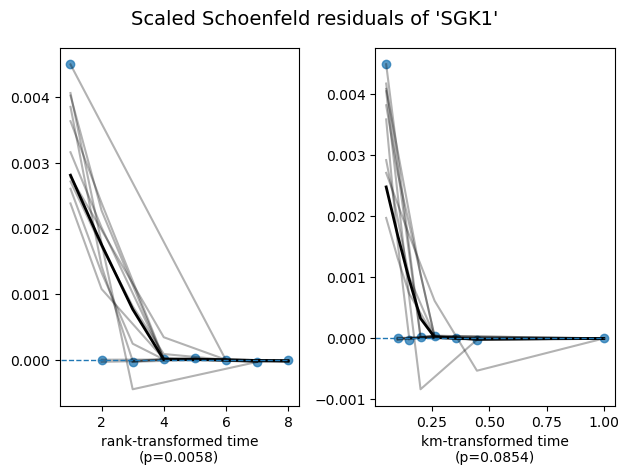

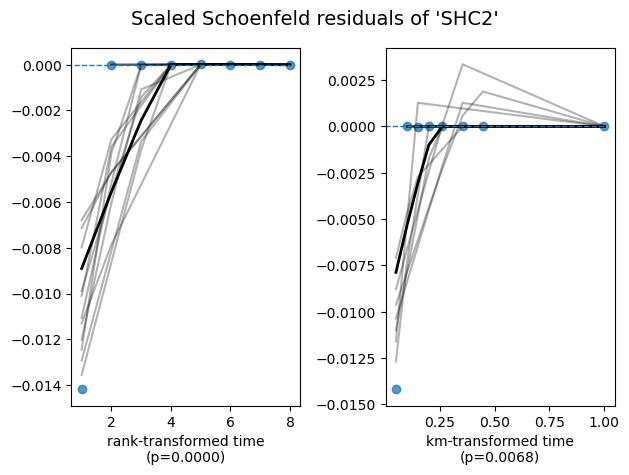

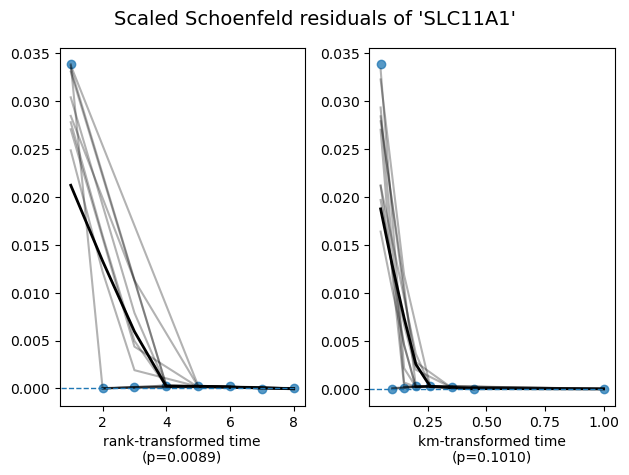

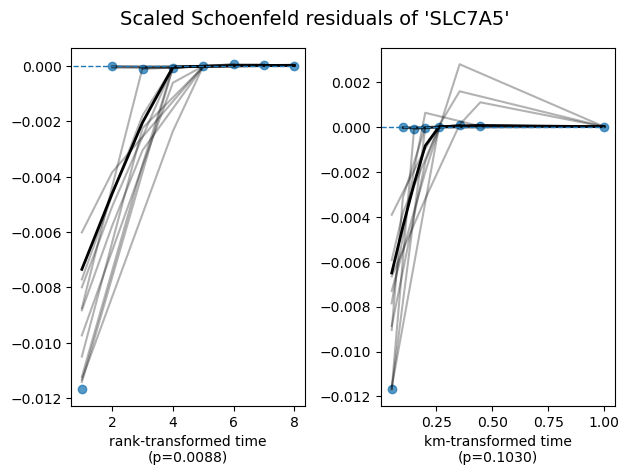

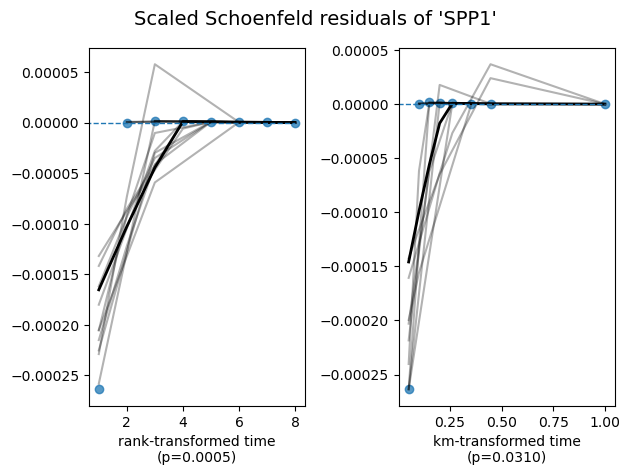

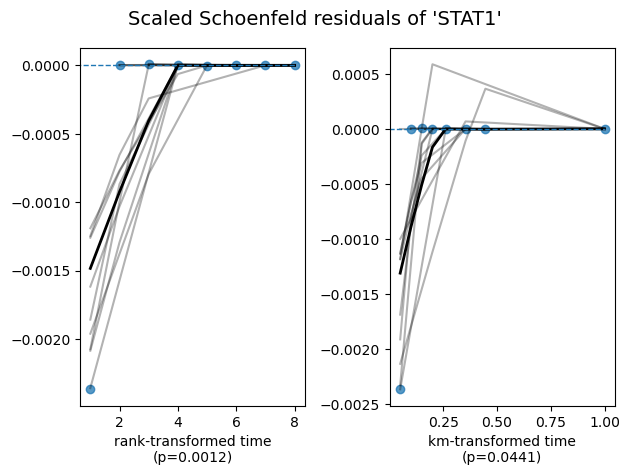

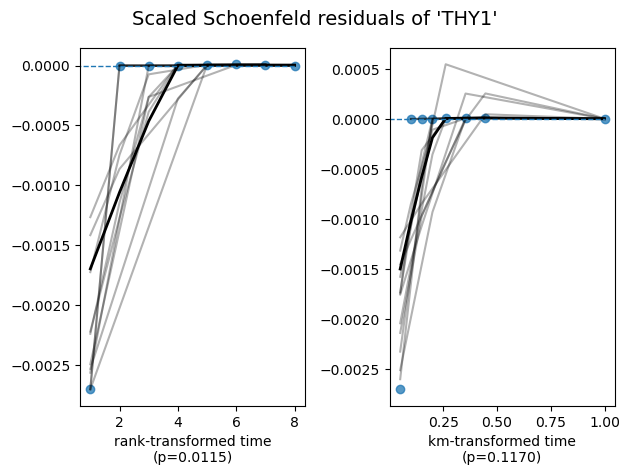

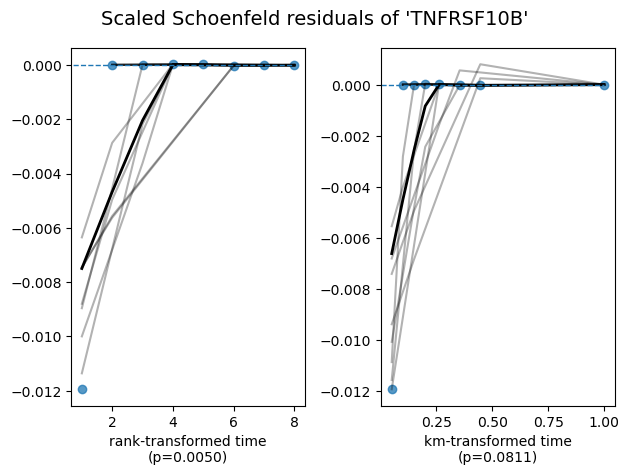

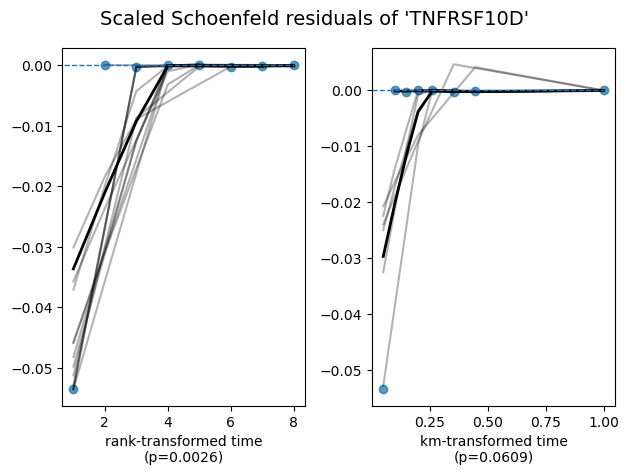

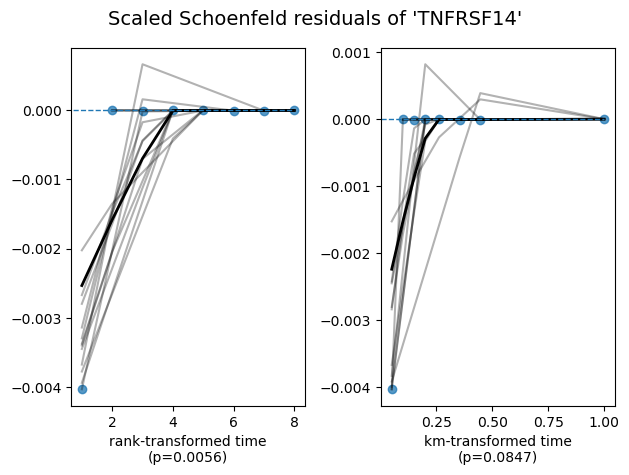

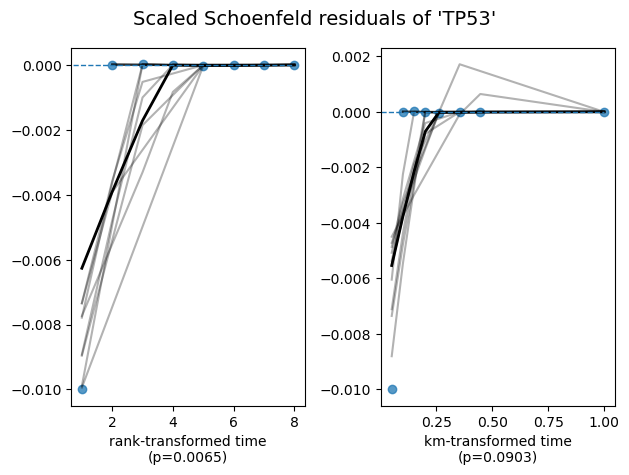

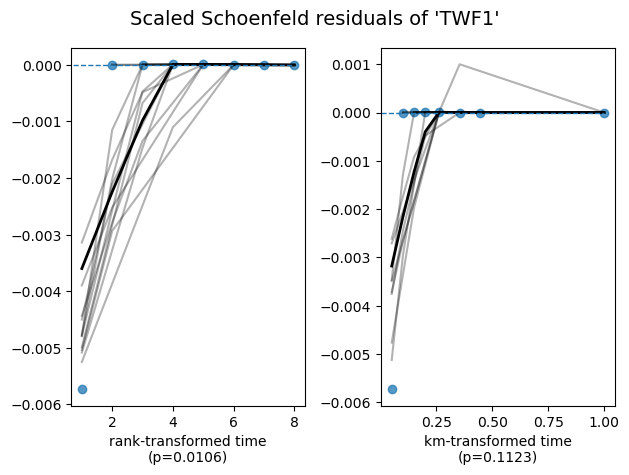

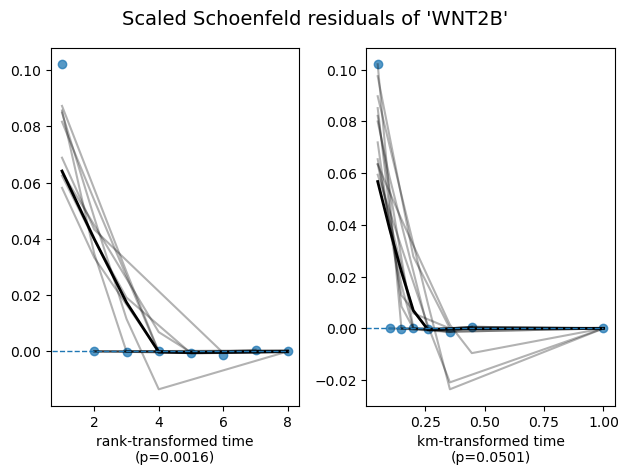

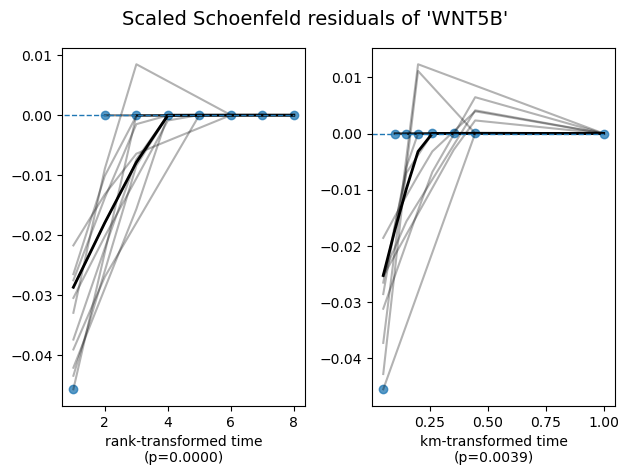

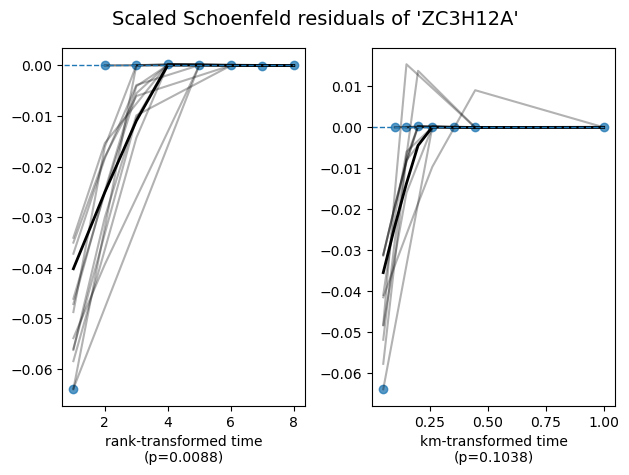

In [ ]:
cph_l2.check_assumptions(train, show_plots=True)


In [ ]:
cph_l2.predict_survival_function(test, times=range(0, 5001, 250))


186       187            177       160
0.0     1.000000  1.000000   1.000000e+00  1.000000
250.0   1.000000  1.000000   1.000000e+00  1.000000
500.0   0.999898  0.998553   3.305009e-17  0.966482
750.0   0.998474  0.978464  1.619062e-248  0.598949
1000.0  0.998213  0.974835  8.222492e-291  0.548774
1250.0  0.996626  0.952978   0.000000e+00  0.321750
1500.0  0.996626  0.952978   0.000000e+00  0.321750
1750.0  0.996626  0.952978   0.000000e+00  0.321750
2000.0  0.996626  0.952978   0.000000e+00  0.321750
2250.0  0.995511  0.937890   0.000000e+00  0.220973
2500.0  0.992462  0.897771   0.000000e+00  0.078945
2750.0  0.986898  0.828636   0.000000e+00  0.011966
3000.0  0.986898  0.828636   0.000000e+00  0.011966
3250.0  0.986898  0.828636   0.000000e+00  0.011966
3500.0  0.986898  0.828636   0.000000e+00  0.011966
3750.0  0.986898  0.828636   0.000000e+00  0.011966
4000.0  0.986898  0.828636   0.000000e+00  0.011966
4250.0  0.986898  0.828636   0.000000e+00  0.011966
4500.0  0.986898  0.828636   0.000000e+00  0.011966
4750.0  0.986898  0.828636   0.000000e+00  0.011966
5000.0  0.986898  0.828636   0.000000e+00  0.011966

In [ ]:
cph_l2.predict_survival_function(test, times=range(0, 5001, 250))


186       187            177       160
0.0     1.000000  1.000000   1.000000e+00  1.000000
250.0   1.000000  1.000000   1.000000e+00  1.000000
500.0   0.999898  0.998553   3.305009e-17  0.966482
750.0   0.998474  0.978464  1.619062e-248  0.598949
1000.0  0.998213  0.974835  8.222492e-291  0.548774
1250.0  0.996626  0.952978   0.000000e+00  0.321750
1500.0  0.996626  0.952978   0.000000e+00  0.321750
1750.0  0.996626  0.952978   0.000000e+00  0.321750
2000.0  0.996626  0.952978   0.000000e+00  0.321750
2250.0  0.995511  0.937890   0.000000e+00  0.220973
2500.0  0.992462  0.897771   0.000000e+00  0.078945
2750.0  0.986898  0.828636   0.000000e+00  0.011966
3000.0  0.986898  0.828636   0.000000e+00  0.011966
3250.0  0.986898  0.828636   0.000000e+00  0.011966
3500.0  0.986898  0.828636   0.000000e+00  0.011966
3750.0  0.986898  0.828636   0.000000e+00  0.011966
4000.0  0.986898  0.828636   0.000000e+00  0.011966
4250.0  0.986898  0.828636   0.000000e+00  0.011966
4500.0  0.986898  0.828636   0.000000e+00  0.011966
4750.0  0.986898  0.828636   0.000000e+00  0.011966
5000.0  0.986898  0.828636   0.000000e+00  0.011966

In [ ]:
cph_l2.predict_median(test)


186       inf
187    7599.0
177     545.0
160    1238.0
Name: 0.5, dtype: float64

In [ ]:
cph_l2.predict_partial_hazard(test)


186       0.006348
187       0.090473
177    2371.055539
160       2.130109
dtype: float64

Residuals

In [ ]:
cph_l2.compute_residuals(train, "martingale").head()



surv_days  death  martingale
129      414.0   True    1.000000
159      490.0   True   -1.000000
163      545.0   True    0.576817
165      644.0   True    0.421159
171      726.0  False   -0.033251

Deviance residuals are martingale residuals transformed to be centered around 0

- Roughly symmetric around zero, with approximate standard deviation equal to 1.
- Positive values mean that the patient died sooner than expected.
- Negative values mean that the patient lived longer than expected (or were censored).
- Very large or small values are likely outliers.

In [ ]:
resid_l2 = cph_l2.compute_residuals(train, "deviance")
resid_l2.head()


surv_days  death  deviance
129      414.0   True  8.261642
159      490.0   True -0.783394
163      545.0   True  0.752507
165      644.0   True  0.501135
171      726.0  False -0.257881

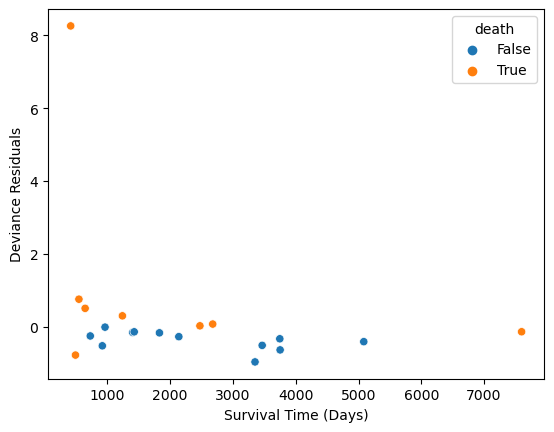

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax = sns.scatterplot(data=resid_l2, hue="death", x="surv_days", y="deviance", legend="brief")
ax.set_xlabel('Survival Days')

plt.show()
plt.savefig('/media/sciobiome/Ventoy/assets/deviance_residuals_rcc.png', dpi=300)


Cross-validation

In [ ]:
from lifelines.utils import k_fold_cross_validation

k = 6
penalizer = 0.1

cph_l2 = CoxPHFitter(penalizer=penalizer, l1_ratio=0.0)
scores_l2 = k_fold_cross_validation(
    cph_l2, data, duration_col="surv_days", event_col="death", k=k
)
scores_l2_CI = k_fold_cross_validation(
    cph_l2,
    data,
    duration_col="surv_days",
    event_col="death",
    k=k,
    scoring_method="concordance_index",
)


In [ ]:
print(scores_l2)
print(scores_l2_CI)


[-0.7855152282714856, -1.5175032702134796, -0.020871581617972534, -8.890309392173, -1.0917402015094244, -0.02897668495368777]
[1.0, 0.6666666666666666, 0.8, 0.5, 0.8, 1.0]


In [ ]:
cph_l2.print_summary(style="latex")


\begin{tabular}{lrrrrrrrrrrr}
 & coef & exp(coef) & se(coef) & coef lower 95% & coef upper 95% & exp(coef) lower 95% & exp(coef) upper 95% & cmp to & z & p & -log2(p) \\
covariate &  &  &  &  &  &  &  &  &  &  &  \\
A2M & -0.00 & 1.00 & 0.00 & -0.00 & 0.00 & 1.00 & 1.00 & 0.00 & -0.04 & 0.97 & 0.04 \\
ACVR1C & -0.00 & 1.00 & 0.05 & -0.10 & 0.10 & 0.90 & 1.10 & 0.00 & -0.02 & 0.98 & 0.03 \\
ADAM12 & 0.00 & 1.00 & 0.00 & -0.00 & 0.00 & 1.00 & 1.00 & 0.00 & 0.01 & 0.99 & 0.01 \\
ADGRE1 & 0.00 & 1.00 & 0.02 & -0.03 & 0.03 & 0.97 & 1.03 & 0.00 & 0.02 & 0.98 & 0.02 \\
ADM & -0.00 & 1.00 & 0.00 & -0.00 & 0.00 & 1.00 & 1.00 & 0.00 & -0.20 & 0.85 & 0.24 \\
ADORA2A & -0.00 & 1.00 & 0.01 & -0.01 & 0.01 & 0.99 & 1.01 & 0.00 & -0.04 & 0.97 & 0.04 \\
AKT1 & -0.00 & 1.00 & 0.00 & -0.00 & 0.00 & 1.00 & 1.00 & 0.00 & -0.03 & 0.98 & 0.03 \\
ALDOA & 0.00 & 1.00 & 0.00 & -0.00 & 0.00 & 1.00 & 1.00 & 0.00 & 0.03 & 0.98 & 0.03 \\
ALDOC & -0.00 & 1.00 & 0.00 & -0.00 & 0.00 & 1.00 & 1.00 & 0.00 & -0.22 & 0.82